In [141]:
library(readxl)
library(ggplot2)
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting
library("np") #npreg: you may need to install it
library(PerformanceAnalytics)
library(psych)
#install.packages('fmsb')
library(fmsb) #For Spider Plots
#install.packages('countrycode')
library(countrycode)
#install.packages(c('hrbrthemes','viridis'))
#library(hrbrthemes)
#library(viridis)
#install.packages('GGally')
library(GGally)
library(dplyr)
library(ggmap)
library(leaflet)
library(htmltools)

library(dplyr) #getMap()
library(rgeos)
#install.packages('rworldmap')
library(rworldmap) #joinCountryData2Map
library(grid)
library(tidyr)
#install.packages(c("cowplot", "googleway", "ggplot2", "ggrepel", "ggspatial", "sf", "rnaturalearth", "rnaturalearthdata"))
library("sf")
library("rnaturalearth")
library("rnaturalearthdata")
#install.packages('writexl')
library(writexl)

Installing package into 'C:/Users/hichul/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'writexl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'writexl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\hichul\Documents\R\win-library\4.0\00LOCK\writexl\libs\x64\writexl.dll to C:\Users\hichul\Documents\R\win-library\4.0\writexl\libs\x64\writexl.dll: Permission denied"
Warning message:
"restored 'writexl'"



The downloaded binary packages are in
	C:\Users\hichul\AppData\Local\Temp\RtmpsXi1lp\downloaded_packages


Warning message:
"package 'writexl' was built under R version 4.0.3"


In [14]:
df.water.access <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-access.xlsx",sheet=1)
dfsimple <- read_excel("C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfsimple.xlsx",sheet=1)
head(df.water.access)
head(dfsimple)
df.wa <- df.water.access[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp' )]

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,2
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,2


      ptap             bore             pspr             uspr       
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.000  
 1st Qu.: 2.775   1st Qu.: 0.225   1st Qu.: 0.000   1st Qu.: 0.000  
 Median :10.300   Median : 3.900   Median : 0.550   Median : 1.050  
 Mean   :11.755   Mean   :12.571   Mean   : 3.128   Mean   : 3.640  
 3rd Qu.:17.675   3rd Qu.:19.925   3rd Qu.: 3.675   3rd Qu.: 2.775  
 Max.   :57.700   Max.   :86.400   Max.   :47.900   Max.   :36.300  
      pwel             uwel             surw             tles      
 Min.   : 0.000   Min.   : 0.000   Min.   : 0.000   Min.   : 0.00  
 1st Qu.: 0.525   1st Qu.: 0.425   1st Qu.: 1.200   1st Qu.:12.72  
 Median : 3.950   Median : 3.750   Median : 4.100   Median :30.65  
 Mean   : 6.314   Mean   : 6.821   Mean   : 5.124   Mean   :32.56  
 3rd Qu.: 8.825   3rd Qu.:10.425   3rd Qu.: 7.525   3rd Qu.:49.88  
 Max.   :48.100   Max.   :33.000   Max.   :19.200   Max.   :75.10  
      tmor             rain             p

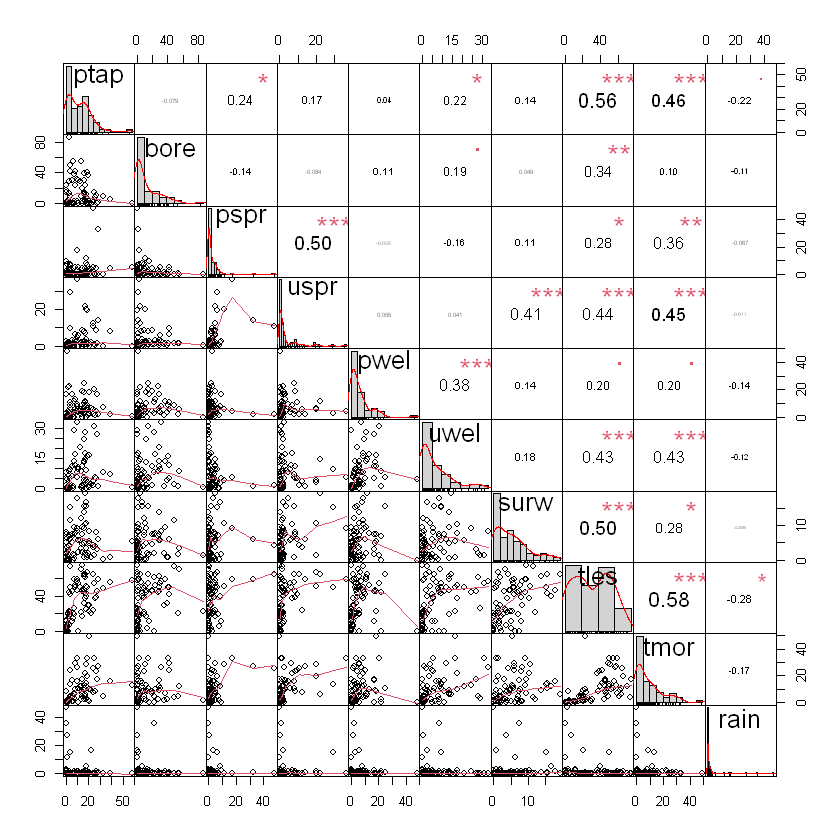

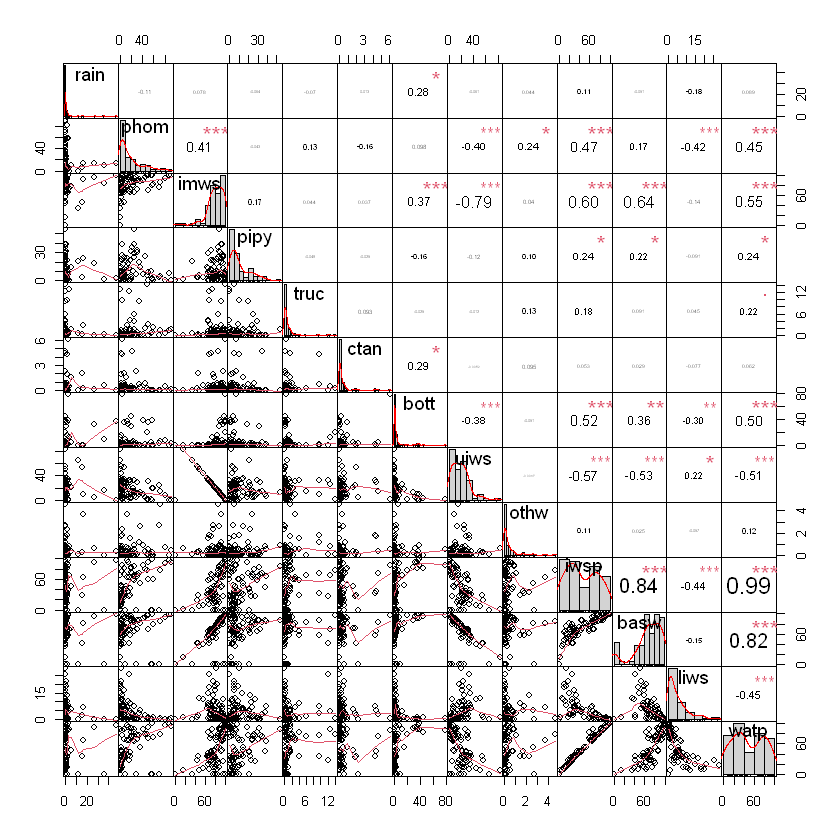

In [25]:
summary(df.wa)
chart.Correlation(df.wa[,1:10], histogram=TRUE, pch=19 , tl.cex = .7 )
chart.Correlation(df.wa[,10:22], histogram=TRUE, pch=19 , tl.cex = .7 )

# Spider Plots of the variables

In [24]:
# Create data: Water Accessibility Aggregate
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:23]
df.wa.aggregate

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,...,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.957895,17.028947,4.8447368,6.6078947,9.110526,11.242105,7.784211,52.57632,16.778947,1.128947,...,8.894737,0.9921053,0.5342105,1.000000,28.21053,0.3447368,26.18684,61.48947,9.357895,29.25789
7.760606,9.245455,1.7030303,0.9545455,2.060606,2.427273,2.672727,16.41818,2.769697,3.290909,...,14.506061,2.1393939,0.5060606,13.209091,10.09091,0.6121212,76.12424,87.60606,1.678788,80.09091
2.342857,4.042857,0.5285714,0.1857143,11.185714,3.528571,2.242857,0.00000,0.000000,6.985714,...,6.271429,0.4000000,0.4142857,2.871429,18.90000,0.4428571,0.00000,0.00000,0.000000,0.00000


# Extract table of cluster centroids.

[1] 124.18773 173.26514  77.99412

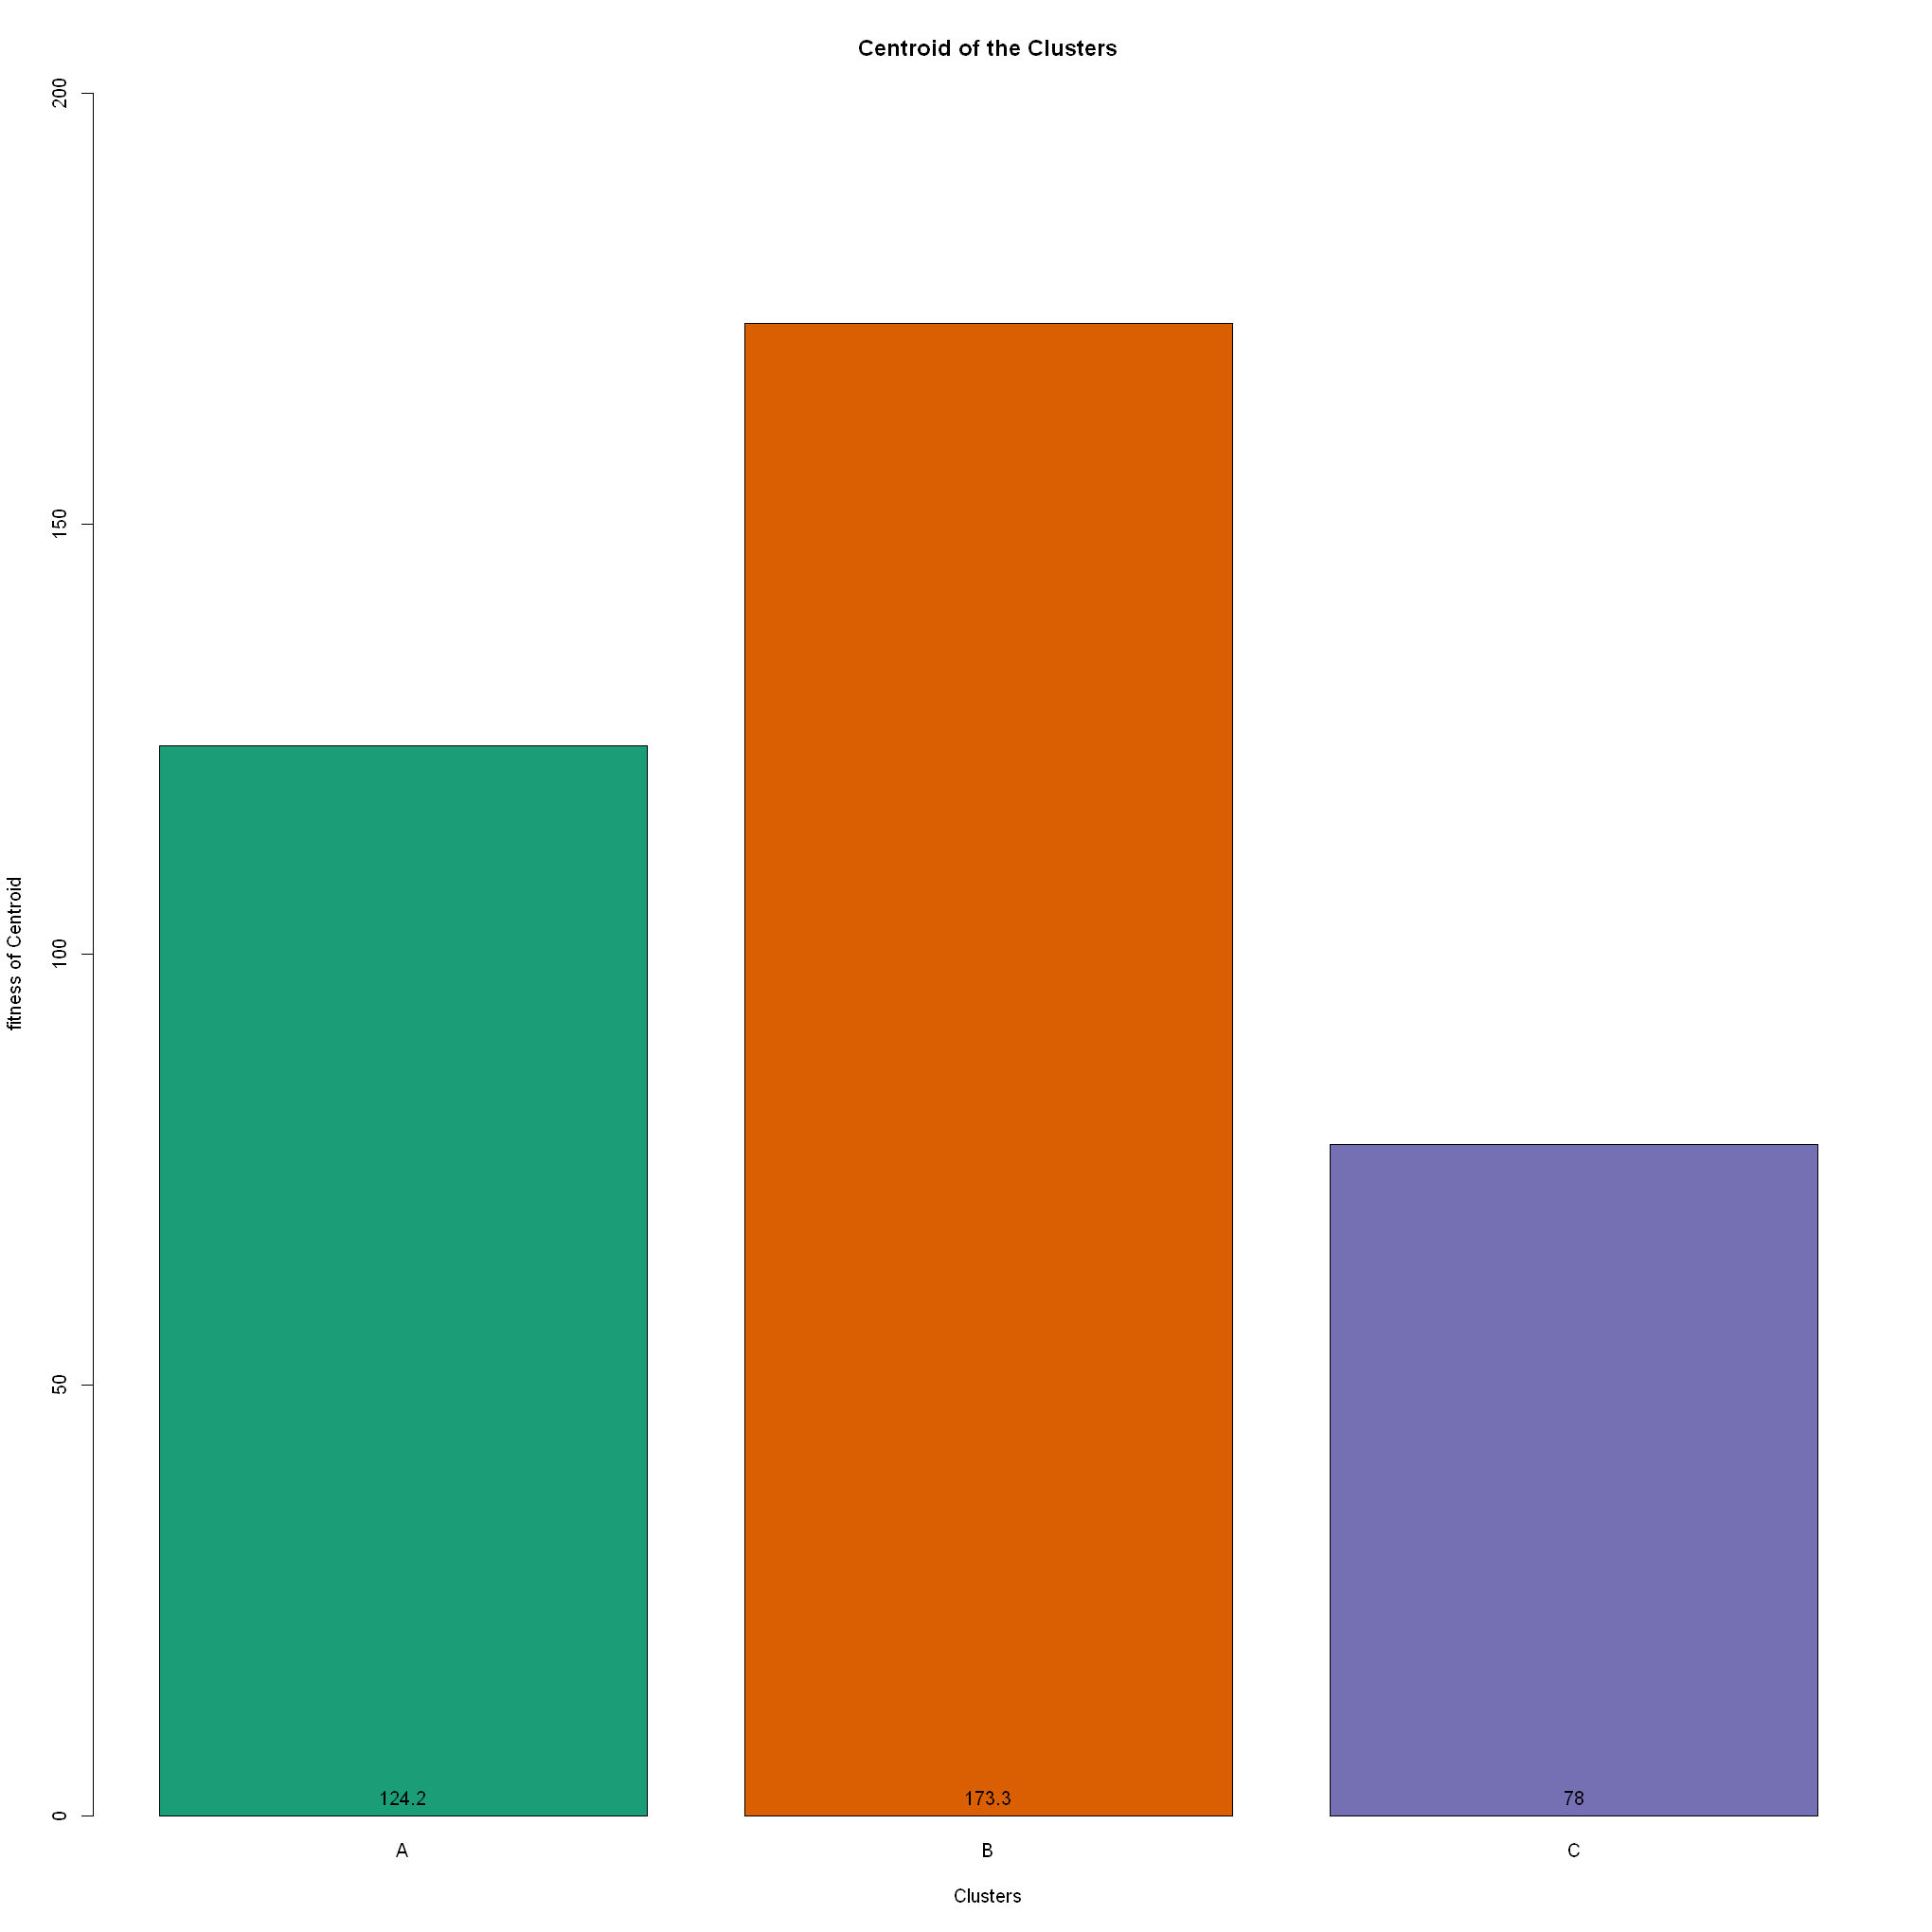

[1] 129.8893 185.8534 119.7919 216.1467 169.8596 195.5154

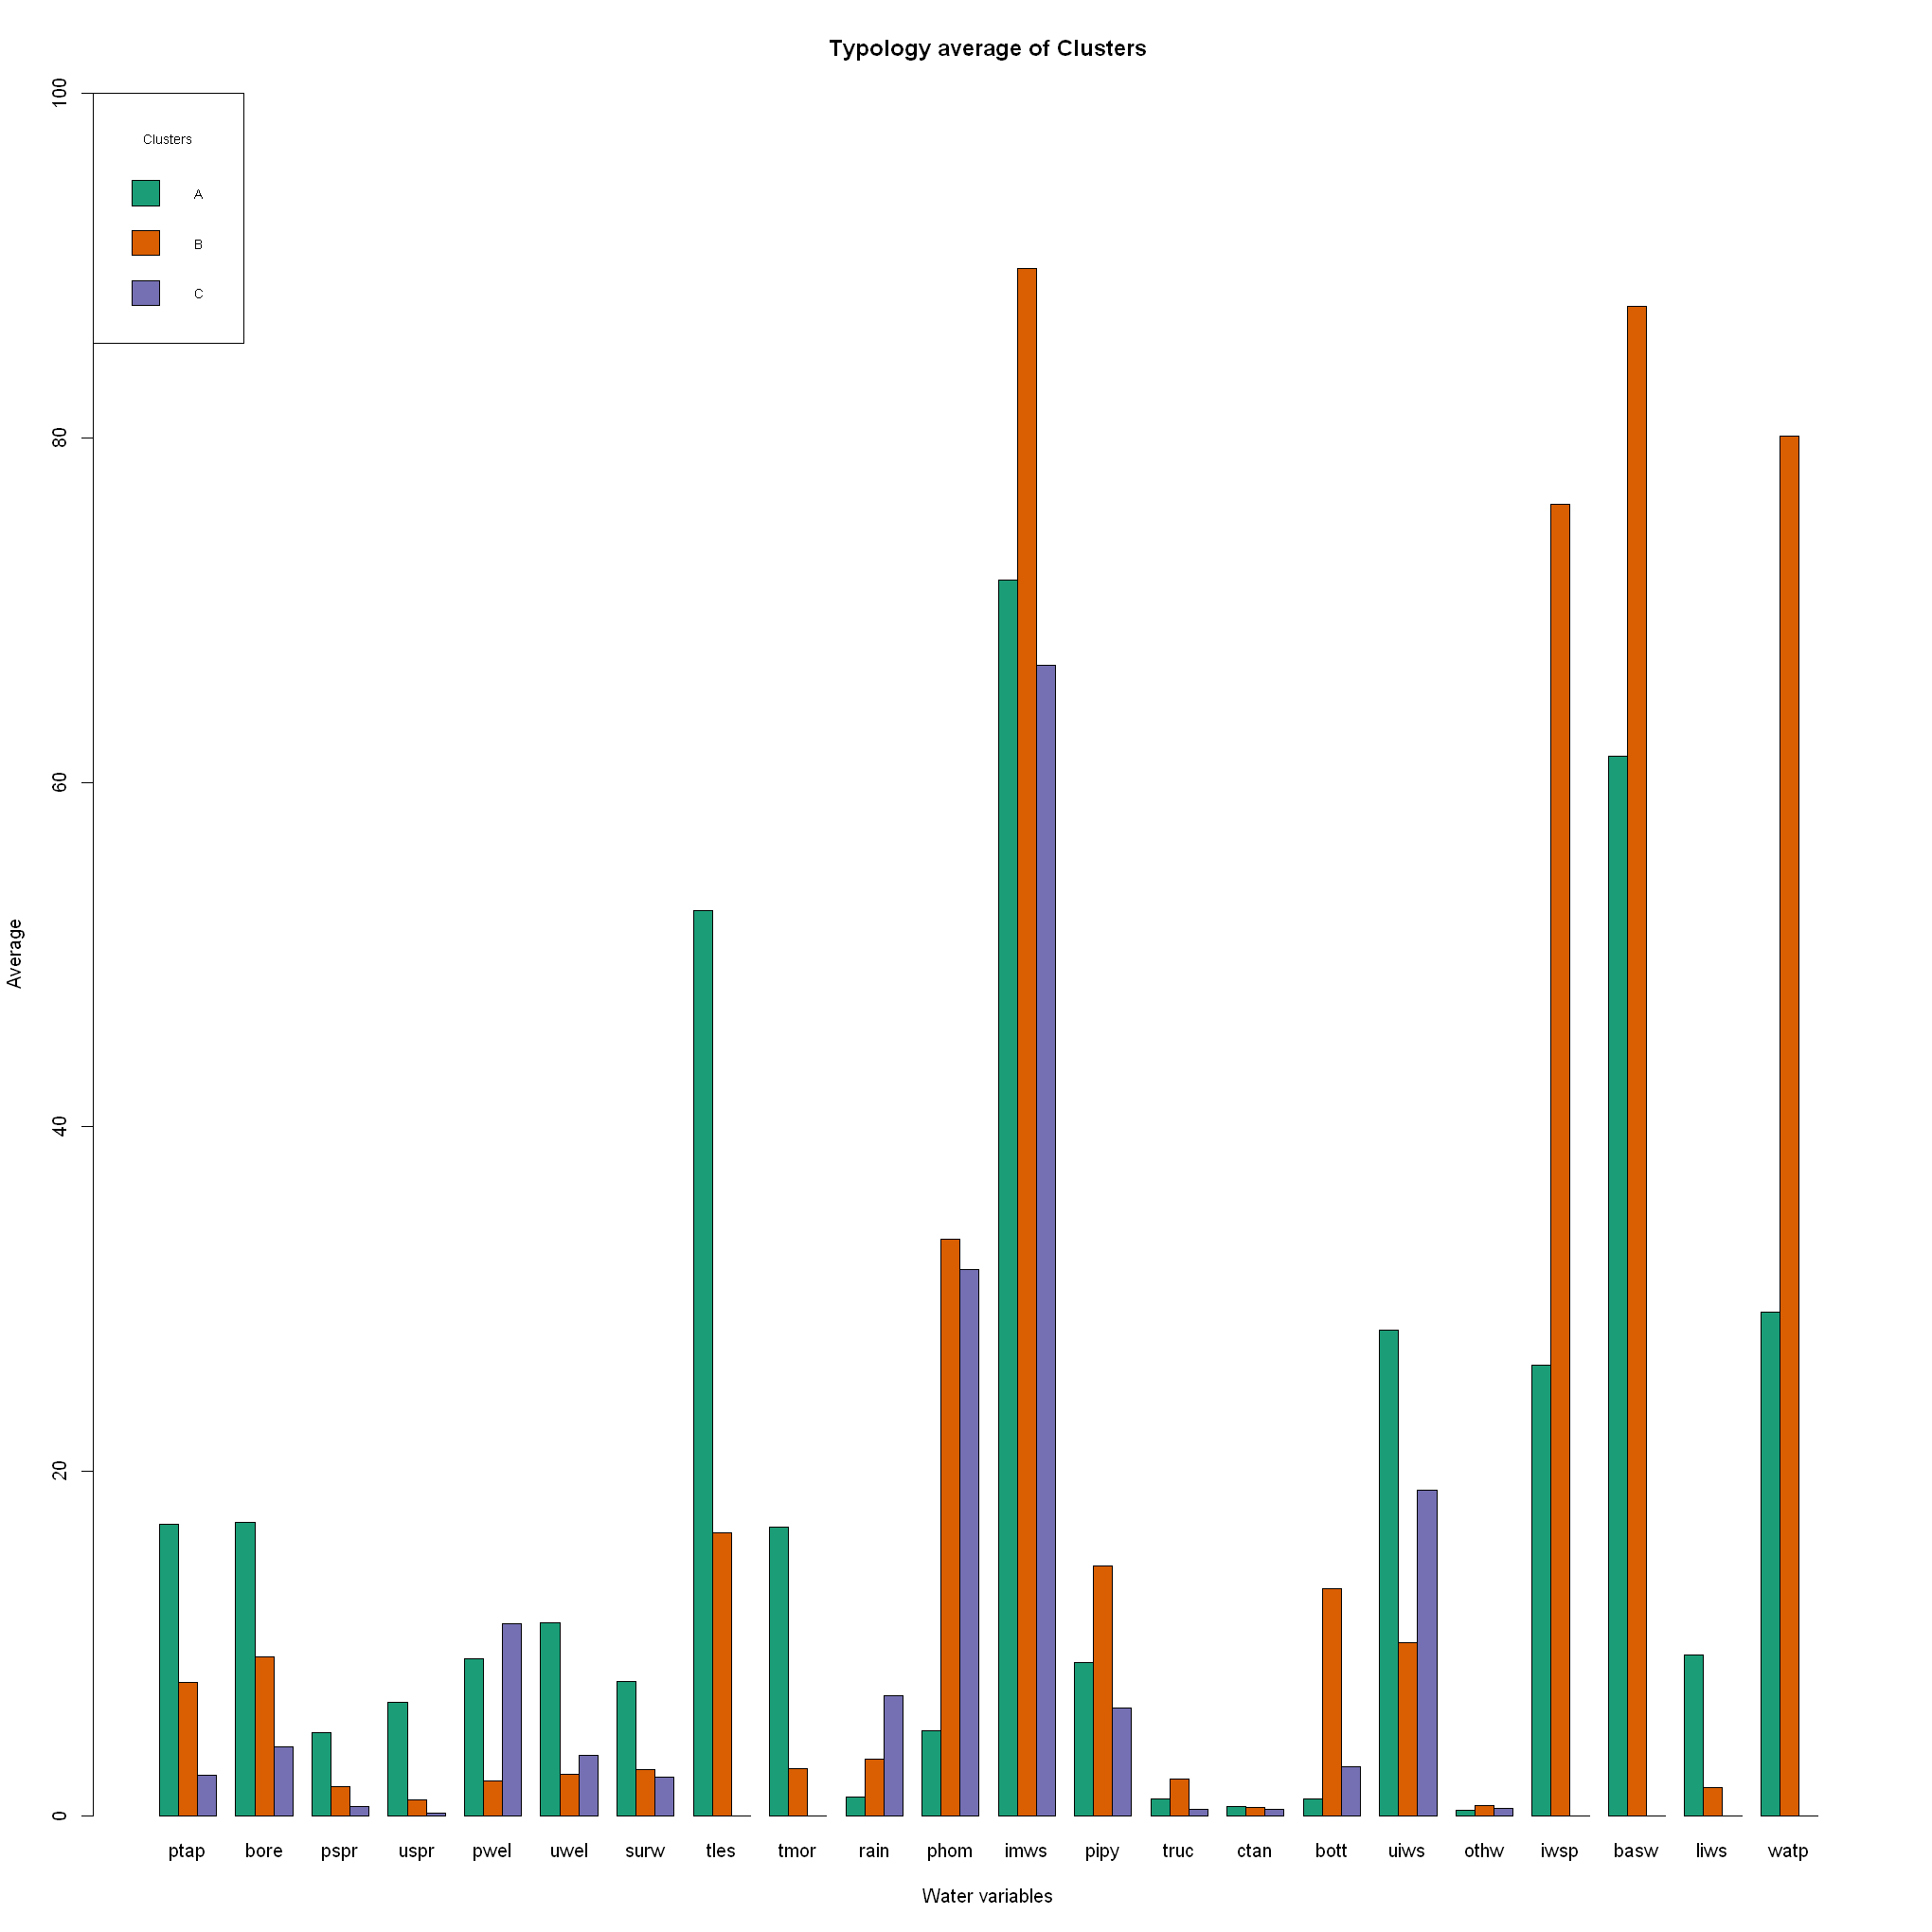

In [39]:
centroid <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the centroid of the cluster
centroid
old.par <- par(mar = c(0, 0, 0, 0))
par(old.par)

bp <- barplot(centroid,
        main = "Centroid of the Clusters", xlab = "Clusters", ylab = "fitness of Centroid",
        col = c("#1b9e77","#d95f02","#7570b3"),
        ylim = c(0, 200), names.arg = c("A", "B", "C"))
text(bp, 0, round(centroid, 1),cex=1,pos=3)

barplot(as.matrix(df.wa.aggregate[,0:22]),
        beside = TRUE,
        main = "Typology average of Clusters", xlab = "Water variables", ylab = "Average",
        col = c("#1b9e77","#d95f02","#7570b3"),
        legend = c("A", "B", "C"), 
        args.legend = list(title = "Clusters", x = "topleft", cex = .7), ylim = c(0, 100))
                  


centroiddf.wa <- apply(df.wa, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster
head(centroiddf.wa)


In [40]:
centroiddf.wa
str(centroiddf.wa)

[1] 129.88930 185.85336 119.79194 216.14673 169.85956 195.51540 128.56096
 [8] 185.04167 105.69328 130.05630 140.09832  96.79861 135.74082 117.44756
[15] 115.25329 203.36598 159.77368 127.59514 114.13413 138.50939 201.34672
[22] 212.88891 118.02305 132.35279 117.11682 166.43927 158.15075 153.36776
[29] 179.21568 129.78894 193.06390 129.30742 187.80506 171.41992 181.28334
[36] 210.45691 151.67927 137.61918 167.70206 140.94776 151.41407 116.57217
[43] 149.59328 205.57548 132.06389 124.32240 110.78312 102.16154 118.38226
[50] 149.51669 154.44213 175.84360 154.69515 121.19975 137.00412 179.78059
[57] 114.34024   0.00000 180.19312 185.53776 132.08671 155.67093 165.39797
[64] 129.15920 182.00918 164.38193 121.12597 150.45843 132.60483 201.28845
[71] 146.25450 126.31544 116.06464 162.74766  77.99295 154.18103 130.36380
[78] 134.03320

 num [1:78] 130 186 120 216 170 ...


# Radar Plot for the aggregated data

ptap       bore       pspr       uspr       pwel       uwel       surw 
 2.3428571  4.0428571  0.5285714  0.1857143  2.0606061  2.4272727  2.2428571 
      tles       tmor       rain       phom       imws       pipy       truc 
 0.0000000  0.0000000  1.1289474  4.9763158 66.7714286  6.2714286  0.4000000 
      ctan       bott       uiws       othw       iwsp       basw       liws 
 0.4142857  1.0000000 10.0909091  0.3447368  0.0000000  0.0000000  0.0000000 
      watp 
 0.0000000

ptap       bore       pspr       uspr       pwel       uwel       surw 
16.9578947 17.0289474  4.8447368  6.6078947 11.1857143 11.2421053  7.7842105 
      tles       tmor       rain       phom       imws       pipy       truc 
52.5763158 16.7789474  6.9857143 33.4606061 89.8181818 14.5060606  2.1393939 
      ctan       bott       uiws       othw       iwsp       basw       liws 
 0.5342105 13.2090909 28.2105263  0.6121212 76.1242424 87.6060606  9.3578947 
      watp 
80.0909091

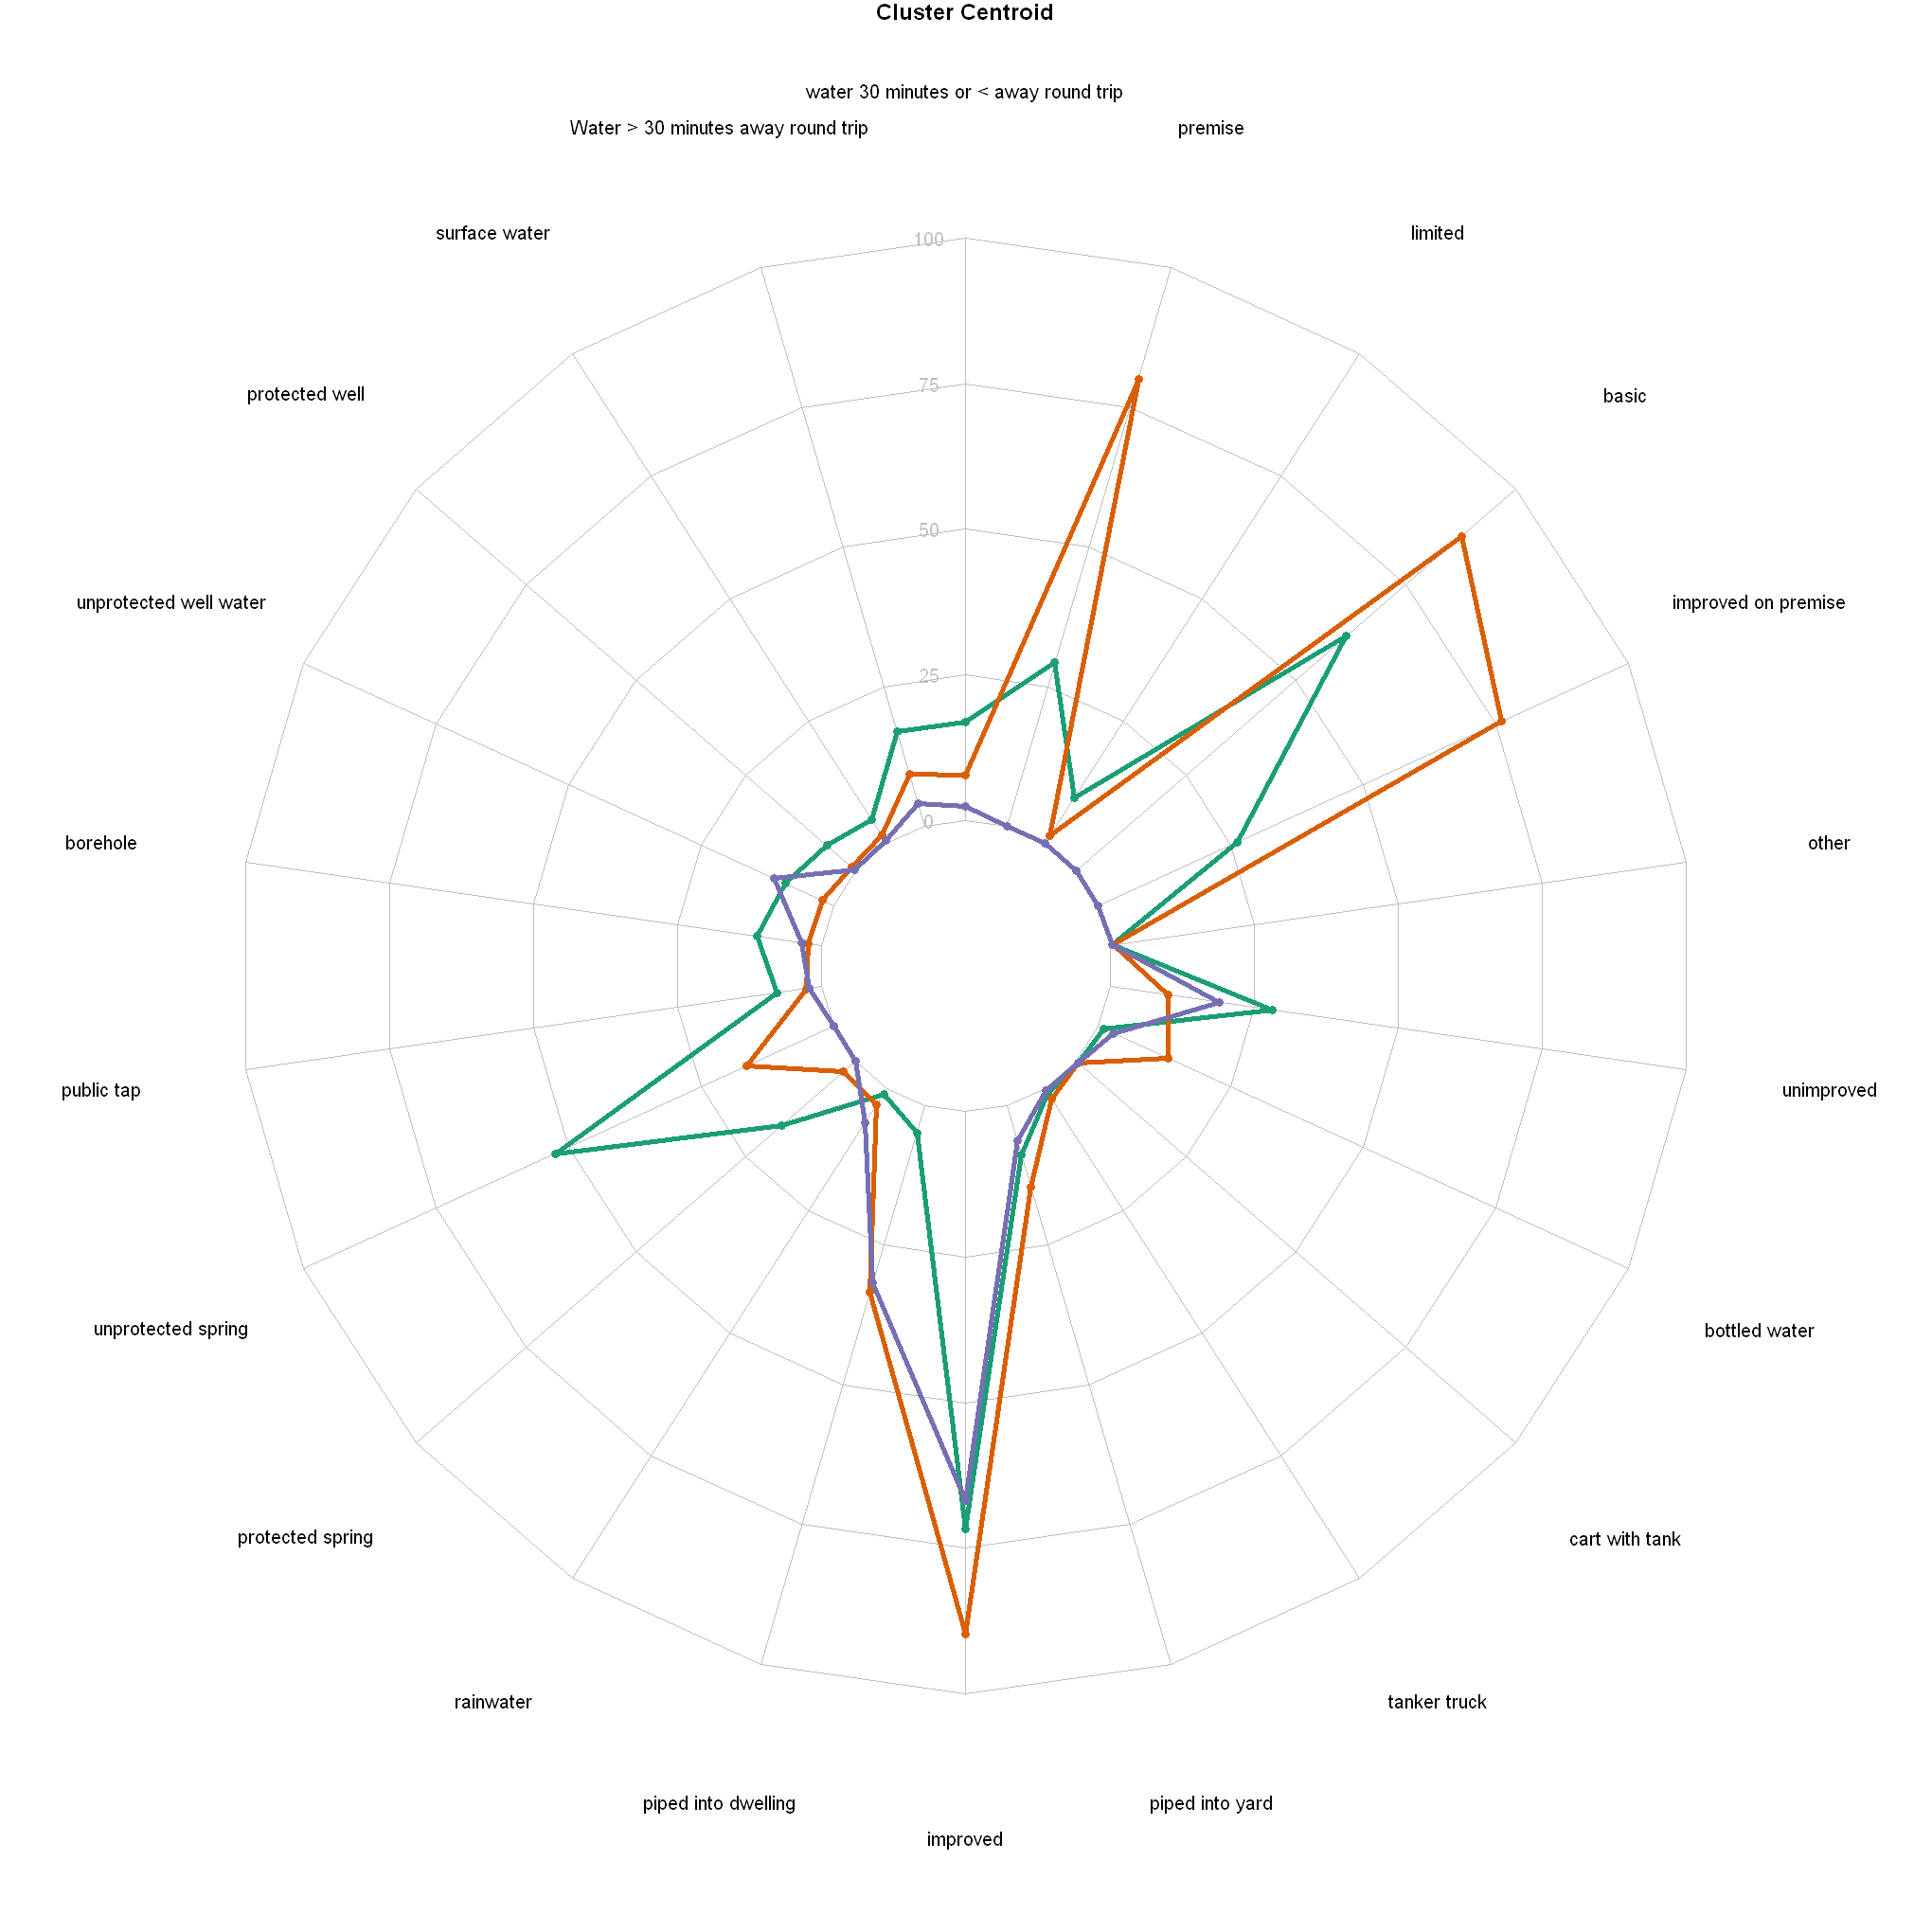

In [57]:
# To use the fmsb package, I have to add 2 lines to the data frame: the max and min of each topic to show on the plot!
max.aggregate = apply(df.wa.aggregate,2,max)
apply(df.wa.aggregate,2,min)
max.aggregate

norm.df.wa <- sweep(df.wa.aggregate, 2, max.aggregate, FUN = '/')
data.spider <- rbind(rep(100,50) , rep(0,10) , df.wa.aggregate)
colnames(data.spider) <- c("water 30 minutes or < away round trip" , "Water > 30 minutes away round trip" , "surface water" , "protected well" , "unprotected well water", "borehole" , "public tap" , "unprotected spring", "protected spring", "rainwater" ,"piped into dwelling"
                          ,'improved'
                           ,'piped into yard',
                           'tanker truck', 
                           'cart with tank',
                           'bottled water',
                           'unimproved',
                           'other',
                           'improved on premise',
                           'basic',
                           'limited',
                           'premise')

options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)

# The default radar chart for First Cluster
r.c. <- radarchart(data.spider,
           #custom polygon
           pcol= c("#1b9e77","#d95f02","#7570b3") ,
           plwd=4 , plty=1,
           #custom the grid
           cglcol="grey", cglty=1, axislabcol="grey", caxislabels= seq(0,100,25), cglwd=0.8, axistype = 4,
           title = 'Cluster Centroid',
           vlcex=1,
           calcex = 1 ,
                   
           )

# Box Plot of Water Accessibility Variables (Violin Plots)

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,...,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.957895,17.028947,4.8447368,6.6078947,9.110526,11.242105,7.784211,52.57632,16.778947,1.128947,...,71.75263,8.894737,0.9921053,0.5342105,1.000000,28.21053,0.3447368,26.18684,61.48947,9.357895
7.760606,9.245455,1.7030303,0.9545455,2.060606,2.427273,2.672727,16.41818,2.769697,3.290909,...,89.81818,14.506061,2.1393939,0.5060606,13.209091,10.09091,0.6121212,76.12424,87.60606,1.678788
2.342857,4.042857,0.5285714,0.1857143,11.185714,3.528571,2.242857,0.00000,0.000000,6.985714,...,66.77143,6.271429,0.4000000,0.4142857,2.871429,18.90000,0.4428571,0.00000,0.00000,0.000000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"position_dodge requires non-overlapping x intervals"


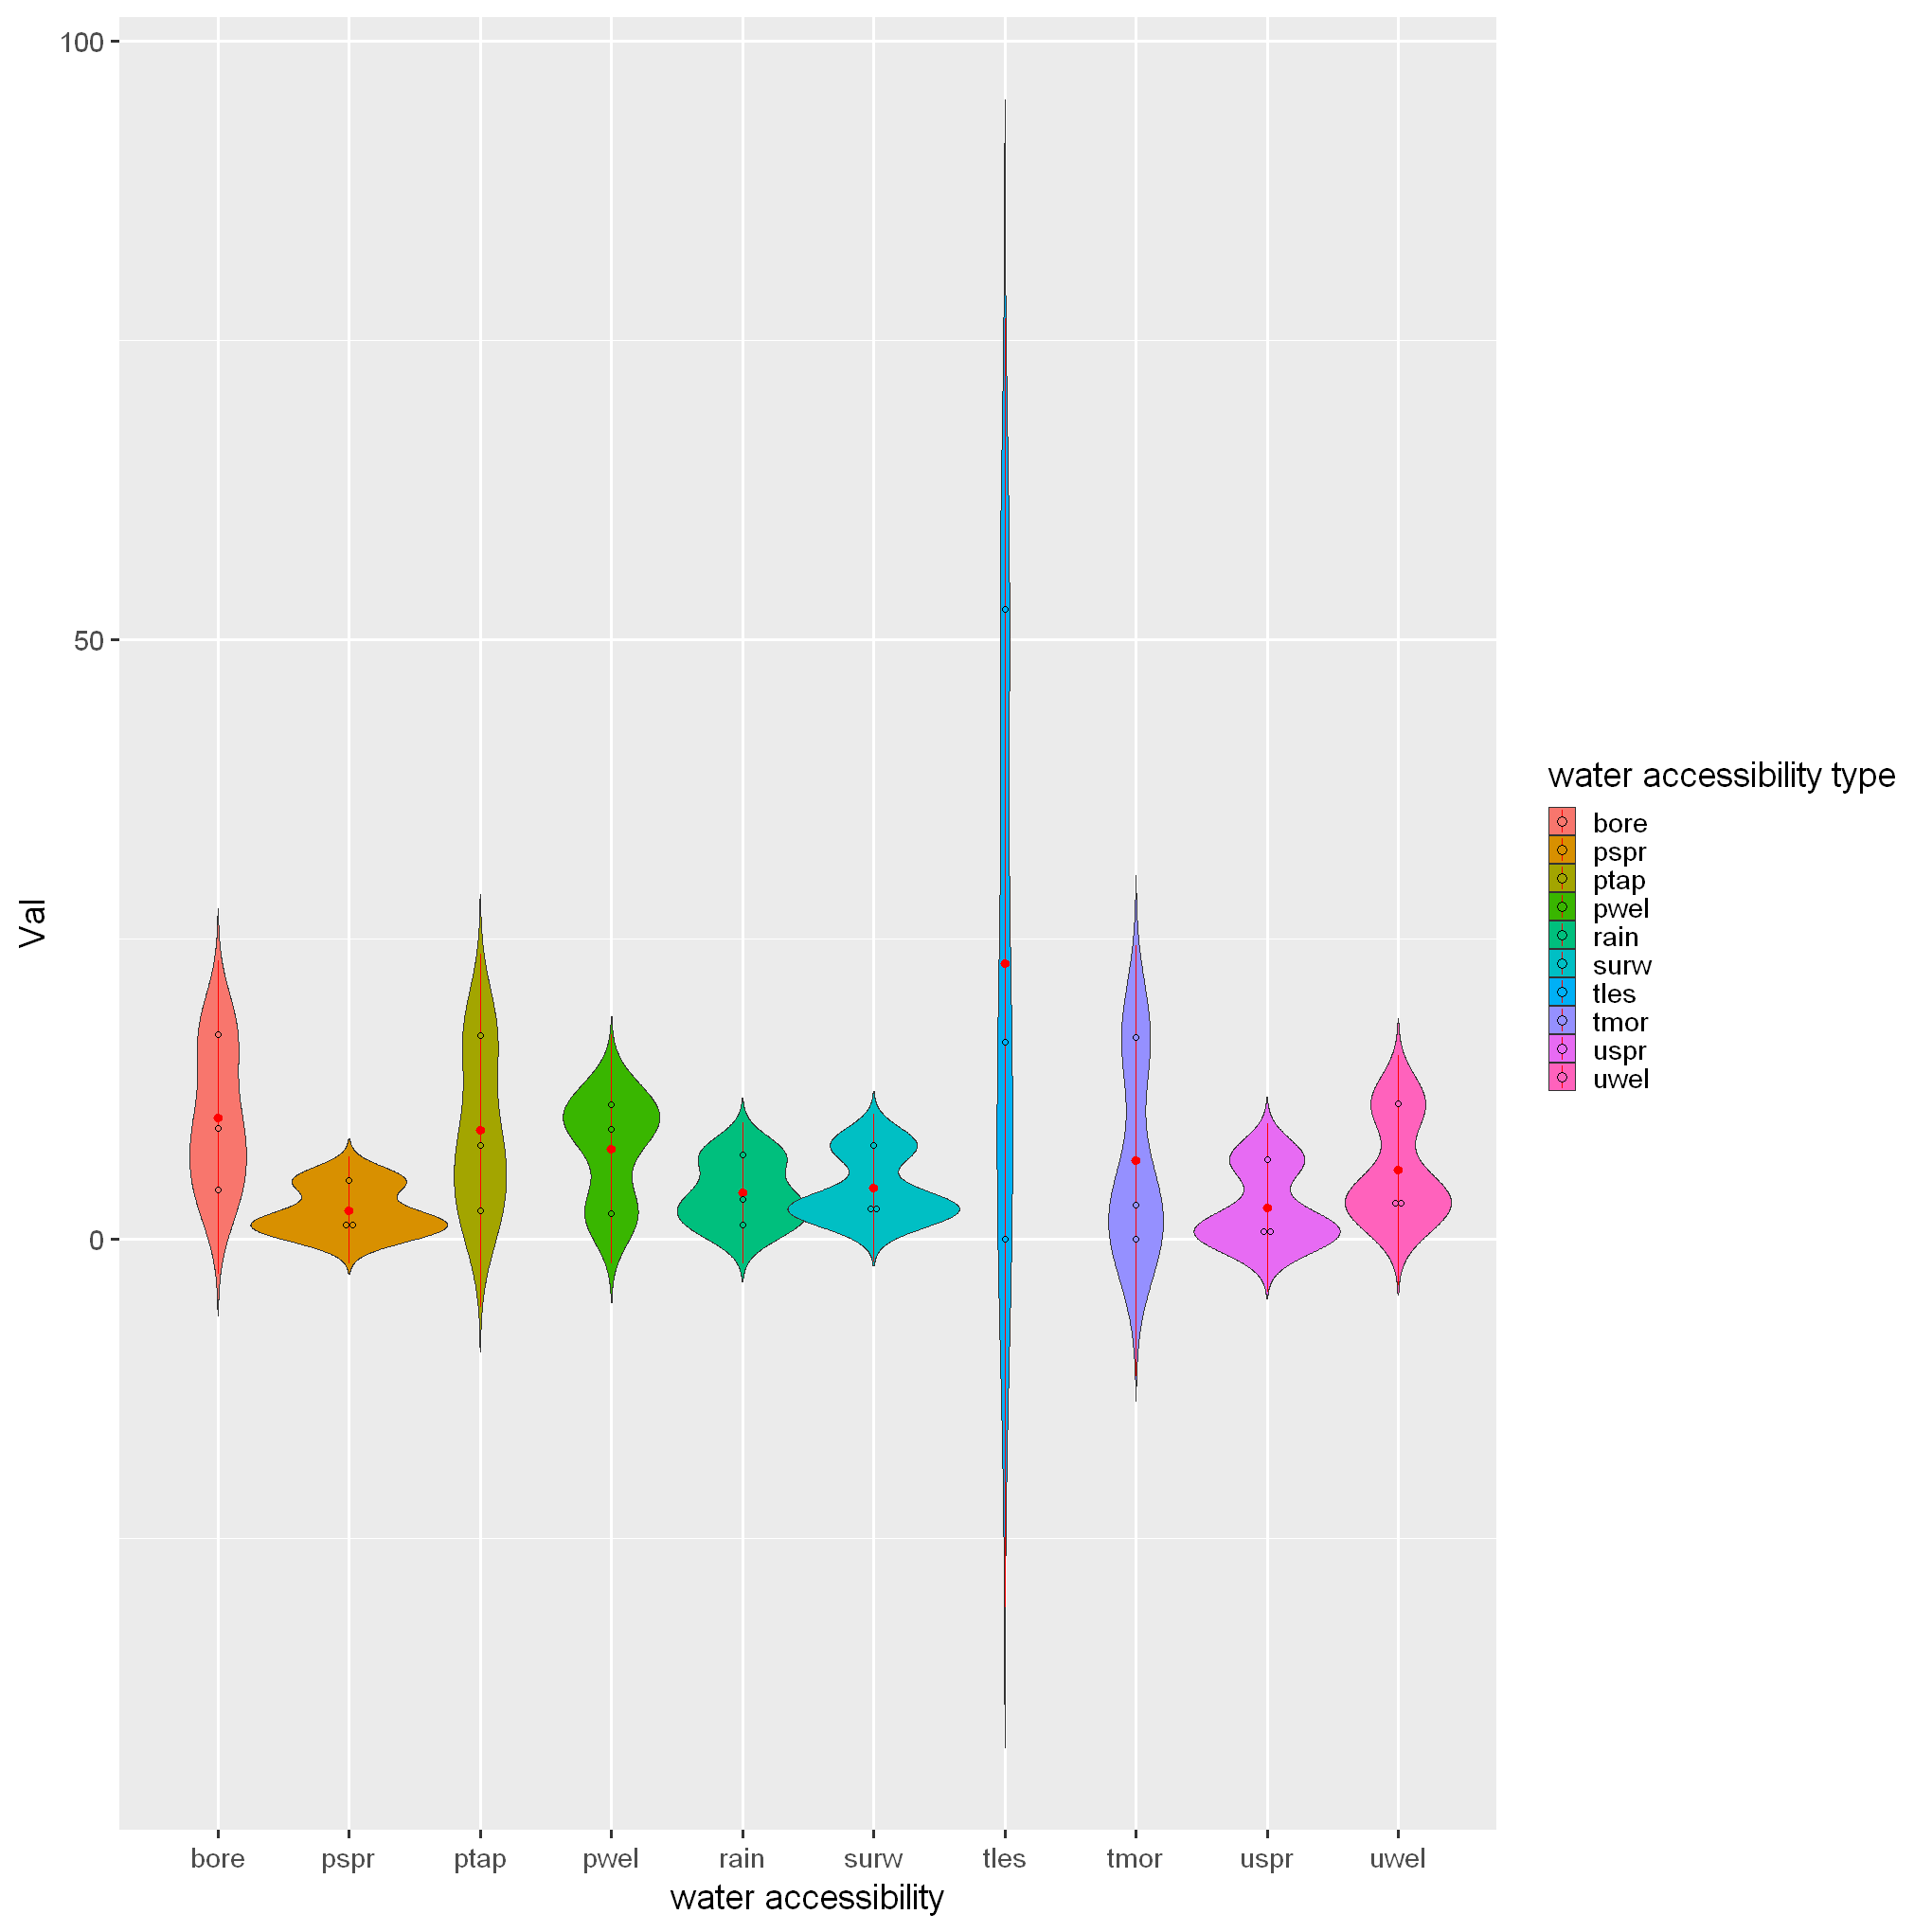

In [81]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:22]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C')

data_wa_one <- df.wa.aggregate[  , 1:10]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, width=1.5, size=.3) + 
    
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,...,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
16.957895,17.028947,4.8447368,6.6078947,9.110526,11.242105,7.784211,52.57632,16.778947,1.128947,...,71.75263,8.894737,0.9921053,0.5342105,1.000000,28.21053,0.3447368,26.18684,61.48947,9.357895
7.760606,9.245455,1.7030303,0.9545455,2.060606,2.427273,2.672727,16.41818,2.769697,3.290909,...,89.81818,14.506061,2.1393939,0.5060606,13.209091,10.09091,0.6121212,76.12424,87.60606,1.678788
2.342857,4.042857,0.5285714,0.1857143,11.185714,3.528571,2.242857,0.00000,0.000000,6.985714,...,66.77143,6.271429,0.4000000,0.4142857,2.871429,18.90000,0.4428571,0.00000,0.00000,0.000000


[1] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
 [9] "factor" "factor" "factor" "factor" "factor" "factor" "factor" "factor"
[17] "factor" "factor" "factor" "factor" "factor"

`stat_bindot()` using `bins = 30`. Pick better value with `binwidth`.



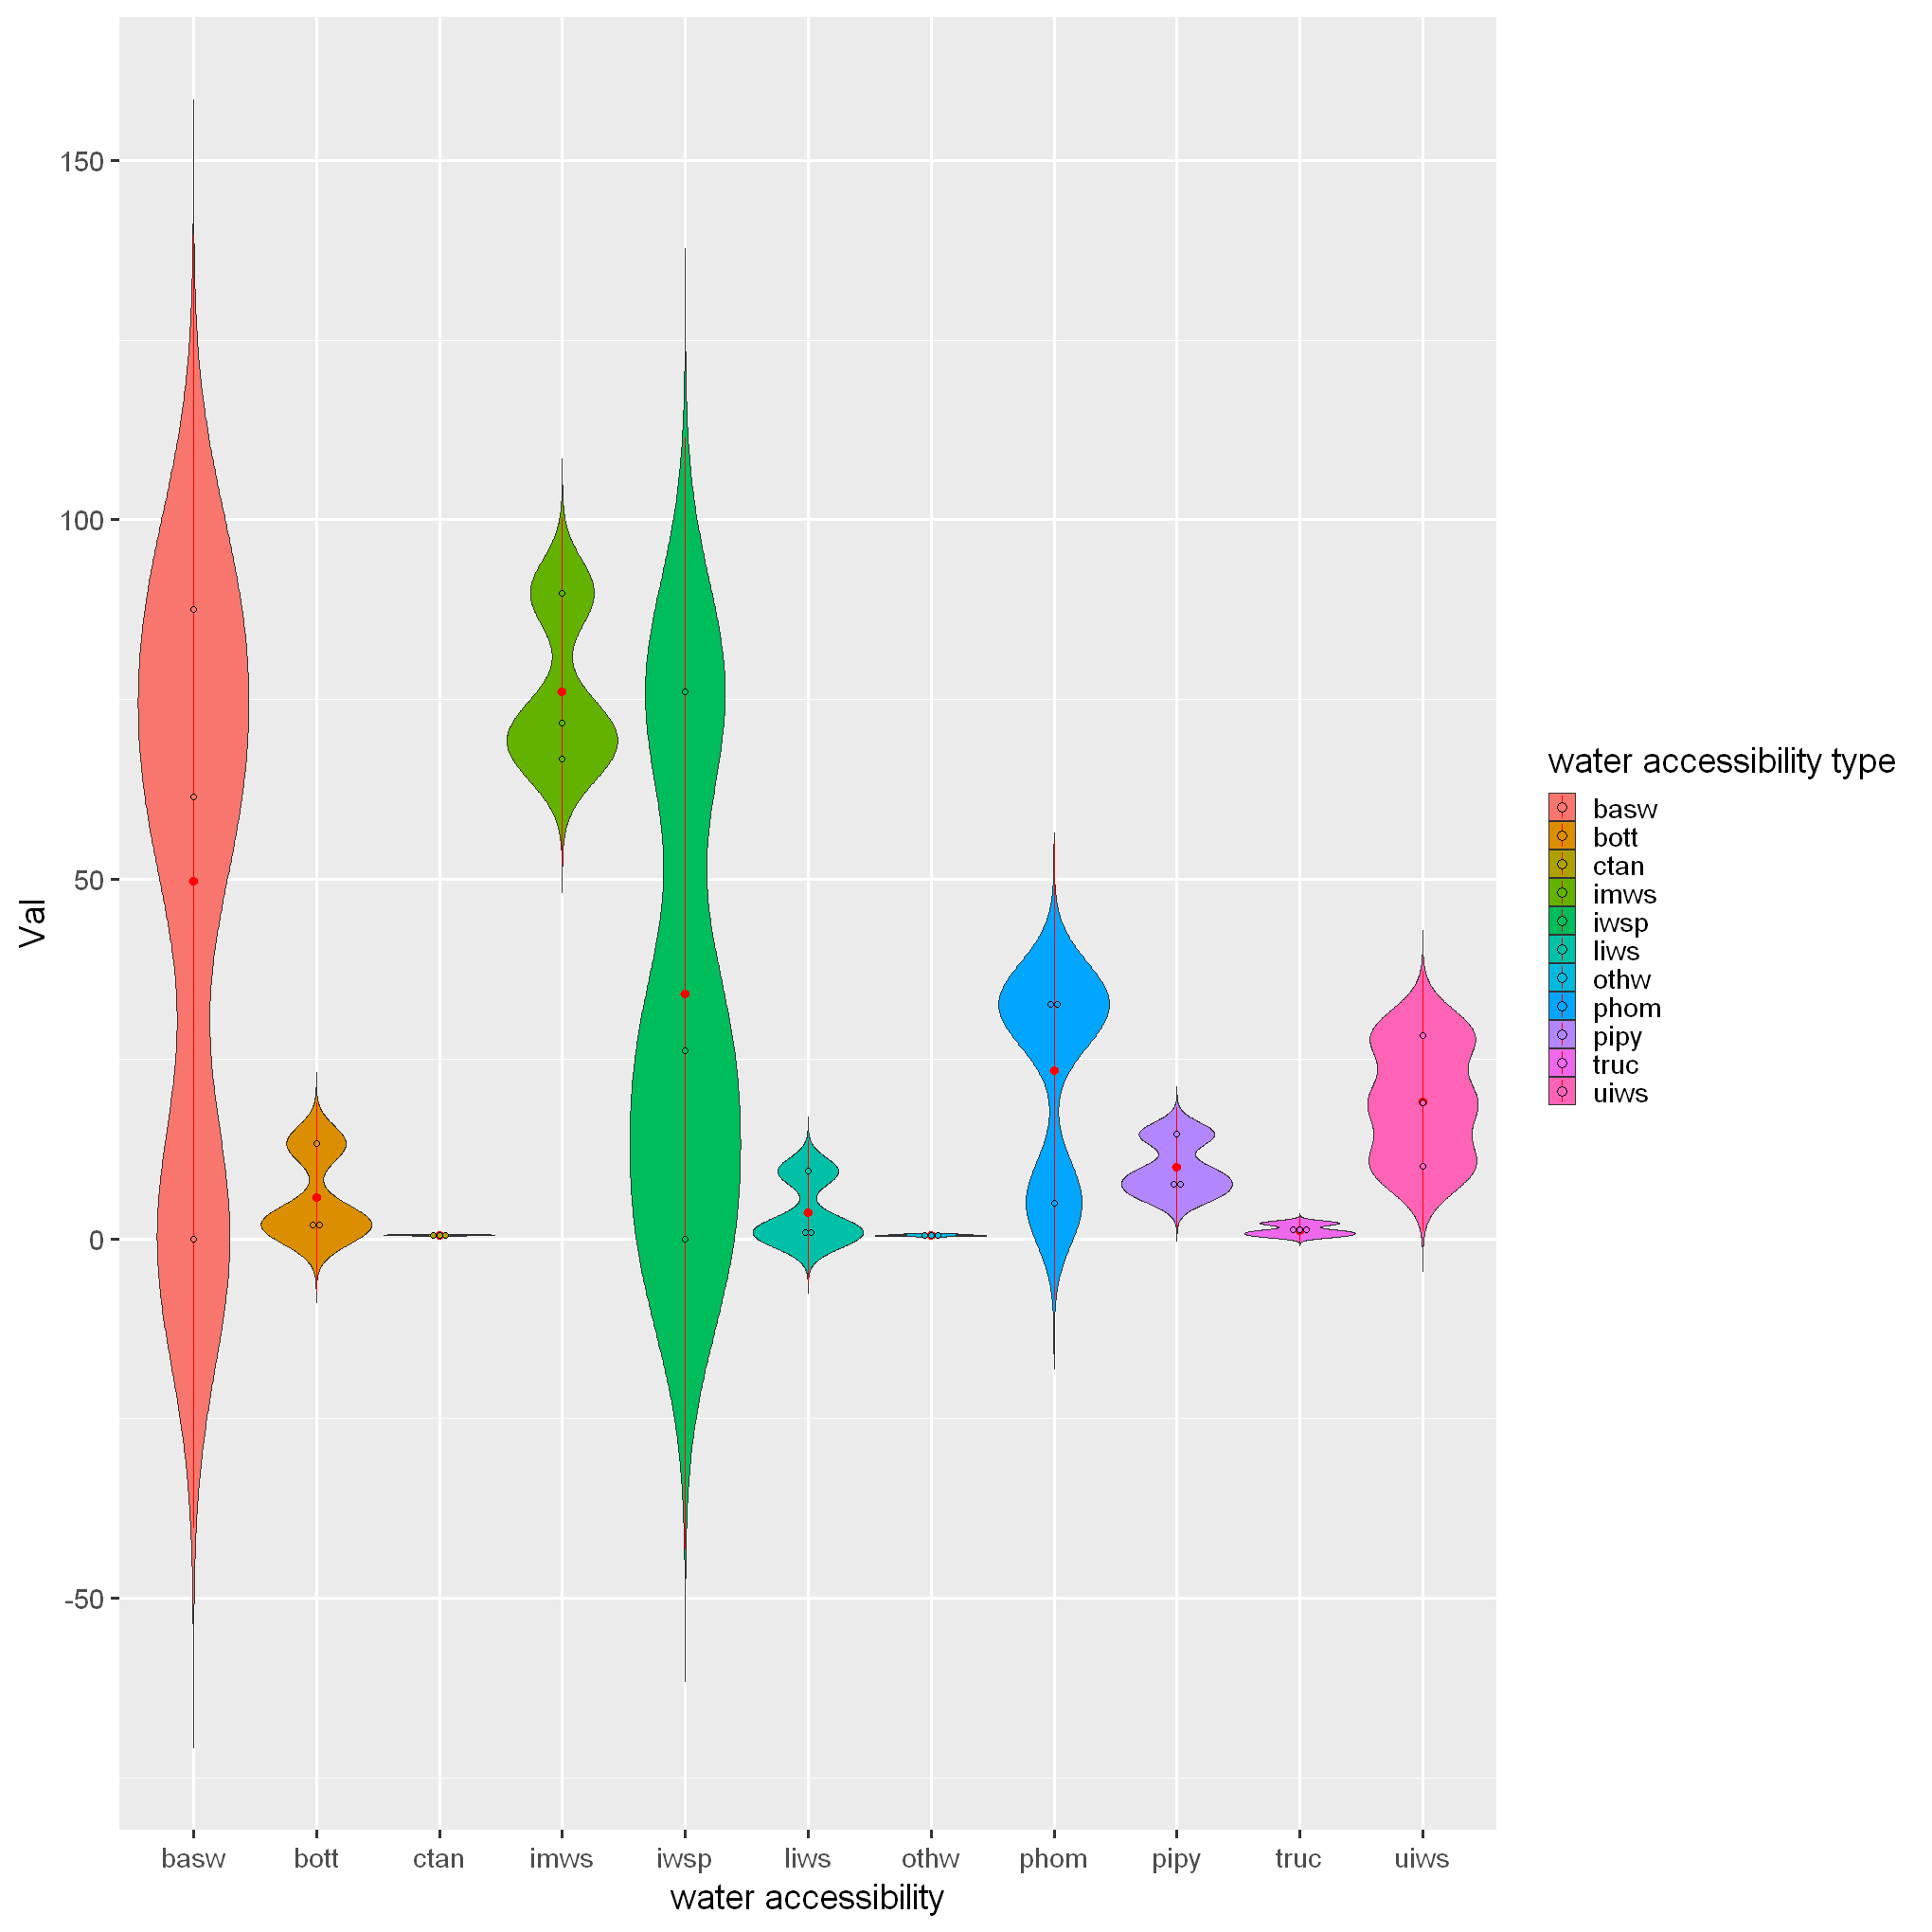

In [98]:
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,2:22]
df.wa.aggregate
rownames(df.wa.aggregate) <- c('A','B','C')

data_wa_one <- df.wa.aggregate[  , 11:21]

df.wa.aggregate <- as.factor(df.wa.aggregate[,])
sapply(df.wa.aggregate, class)


options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=5)

p <- data_wa_one %>% 
    gather(key="MesureType", value="Val") %>%
    ggplot( aes(x=MesureType, y=Val, fill=MesureType)) +
    geom_violin(trim=FALSE, scale = "width"  , size=.3, adjust = .75) + 
    stat_summary(fun.data=mean_sdl, geom="pointrange", color="red") + 
    scale_color_brewer(palette="Dark2") +
    xlab('water accessibility') +
    geom_dotplot(binaxis='y', stackdir='center', dotsize=.3) +
    guides(fill =guide_legend("water accessibility type"))
p <- p + theme_grey(base_size = 22)
p 




# Country's Centroids Rankings Demo


 1  2  3 
38 33  7 

clusters,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,imws,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,16.957895,17.028947,4.8447368,6.6078947,9.110526,11.242105,7.784211,52.57632,16.778947,...,71.75263,8.894737,0.9921053,0.5342105,1.000000,28.21053,0.3447368,26.18684,61.48947,9.357895
2,7.760606,9.245455,1.7030303,0.9545455,2.060606,2.427273,2.672727,16.41818,2.769697,...,89.81818,14.506061,2.1393939,0.5060606,13.209091,10.09091,0.6121212,76.12424,87.60606,1.678788
3,2.342857,4.042857,0.5285714,0.1857143,11.185714,3.528571,2.242857,0.00000,0.000000,...,66.77143,6.271429,0.4000000,0.4142857,2.871429,18.90000,0.4428571,0.00000,0.00000,0.000000


clusters      ptap      bore      pspr      uspr      pwel      uwel      surw 
 "factor" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     tles      tmor      rain      phom      imws      pipy      truc      ctan 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" "numeric" 
     bott      uiws      othw      iwsp      basw      liws 
"numeric" "numeric" "numeric" "numeric" "numeric" "numeric"

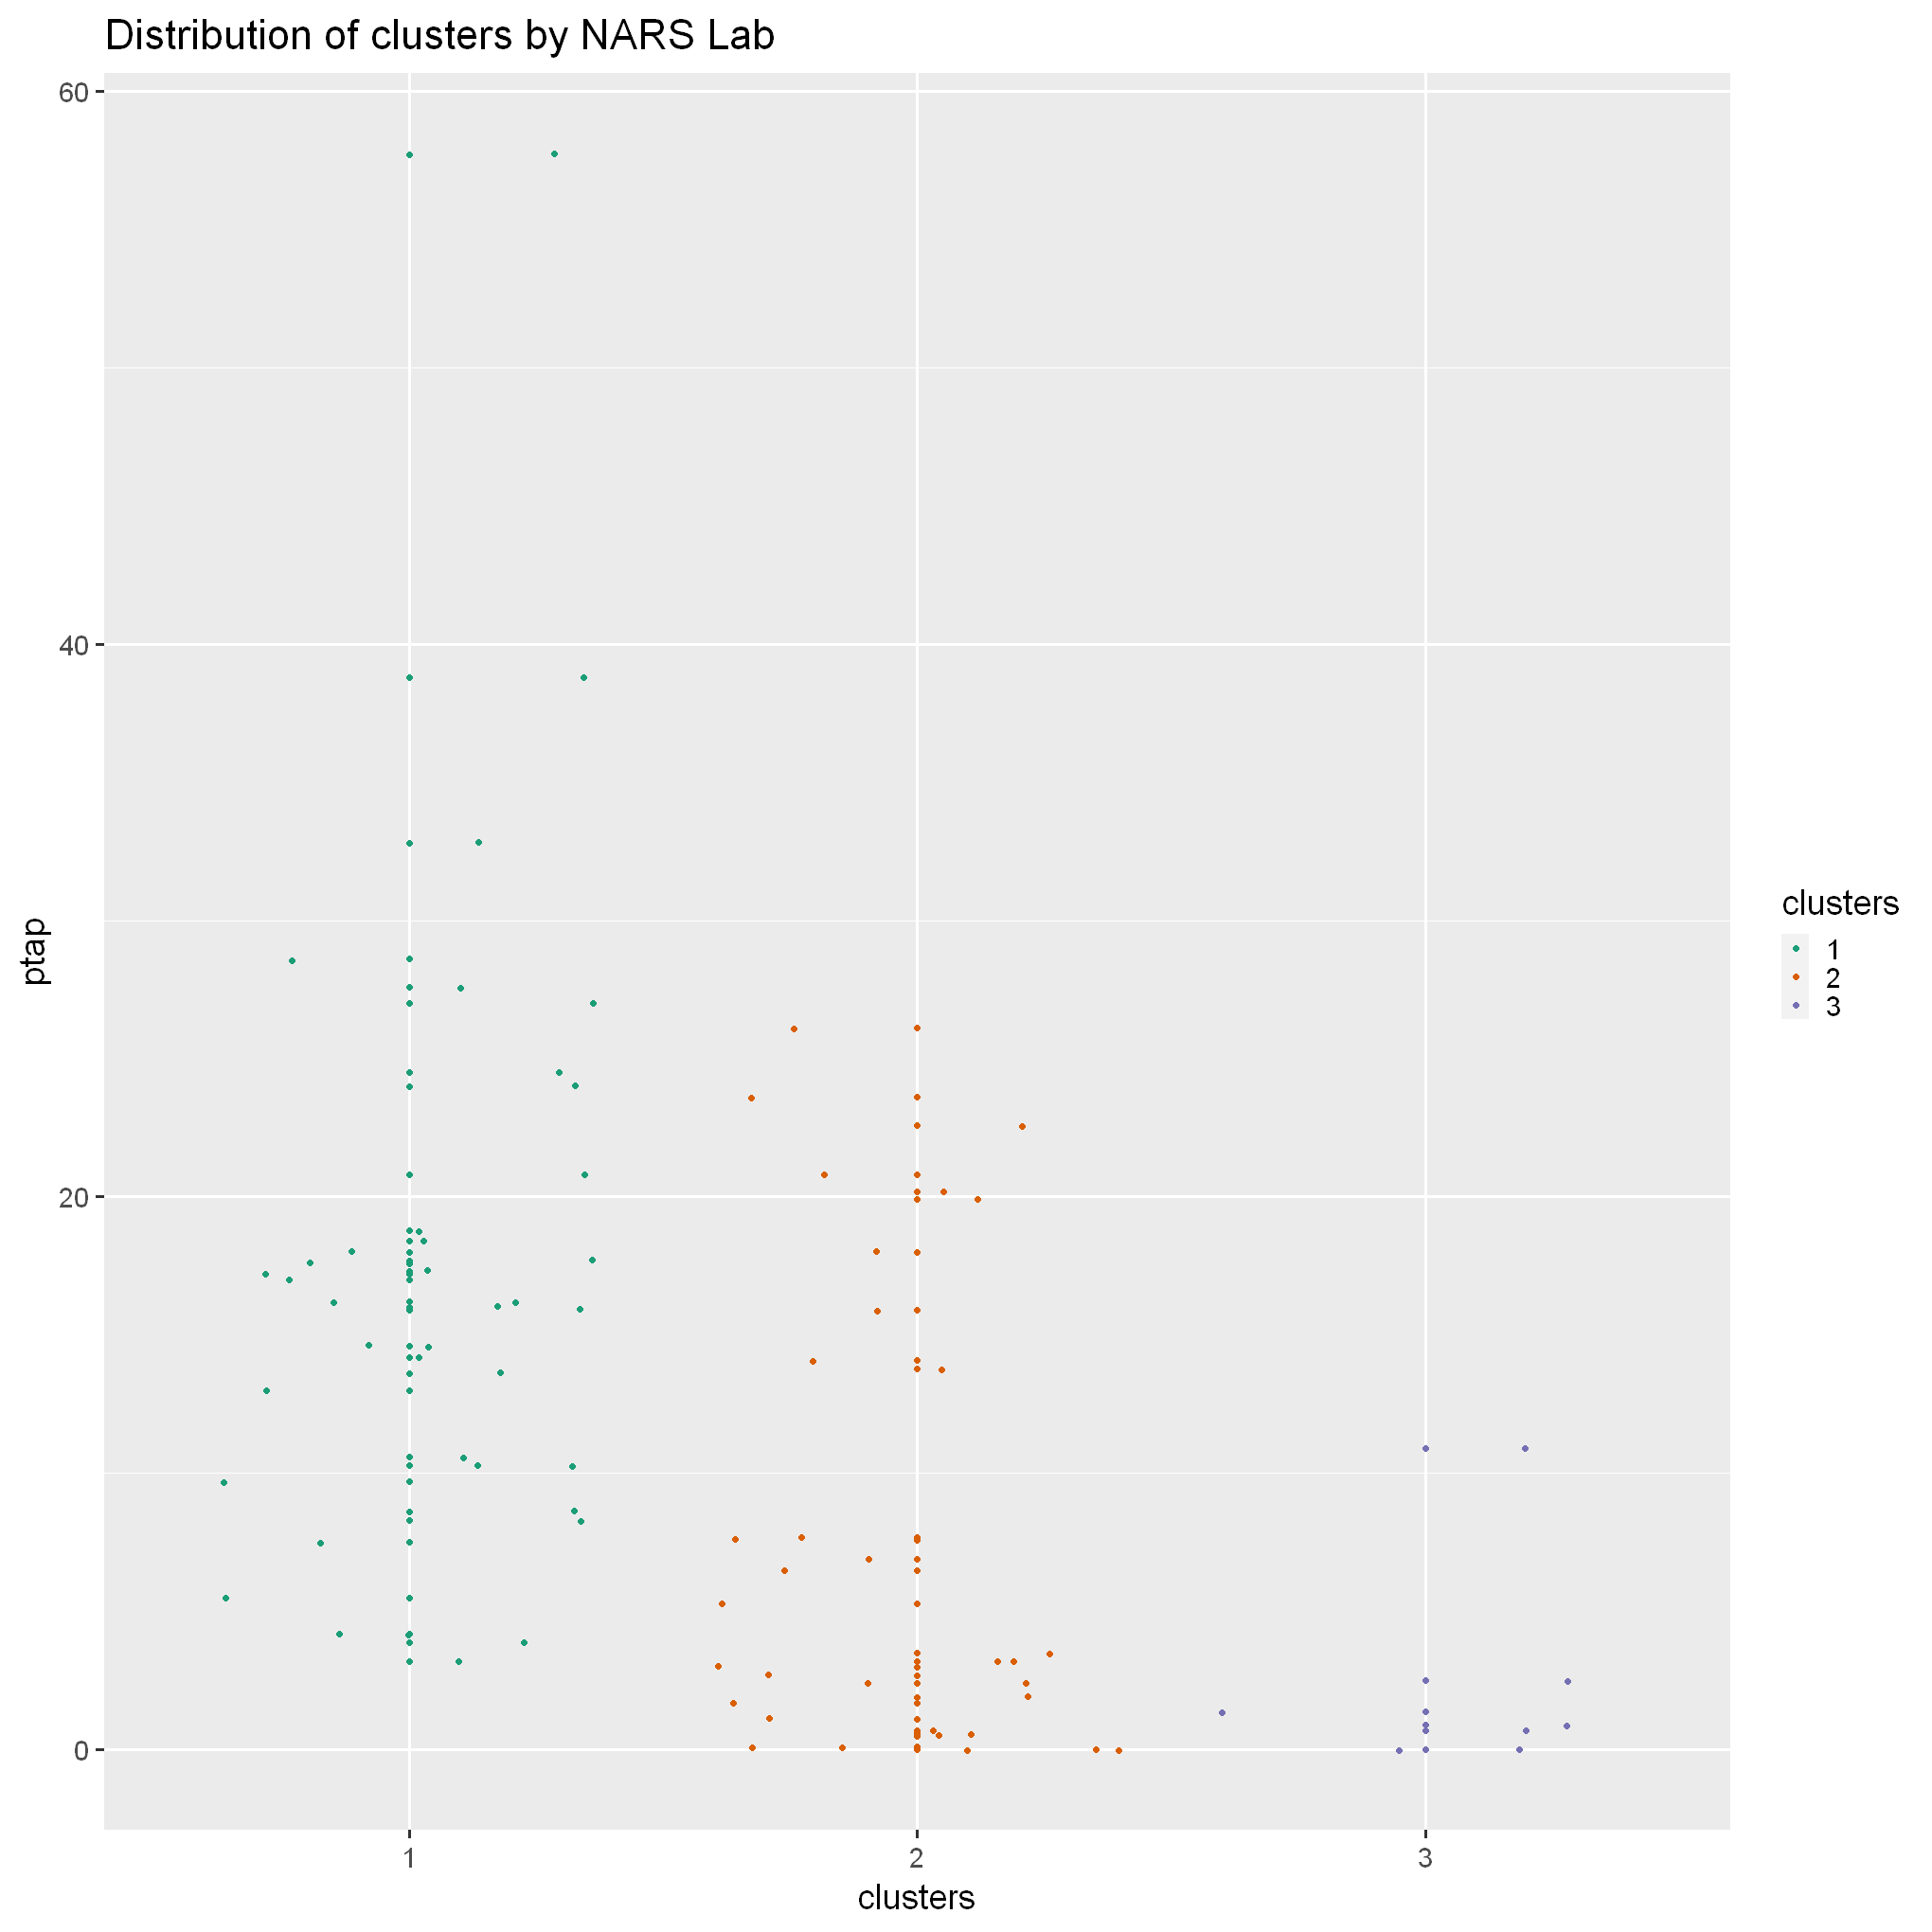

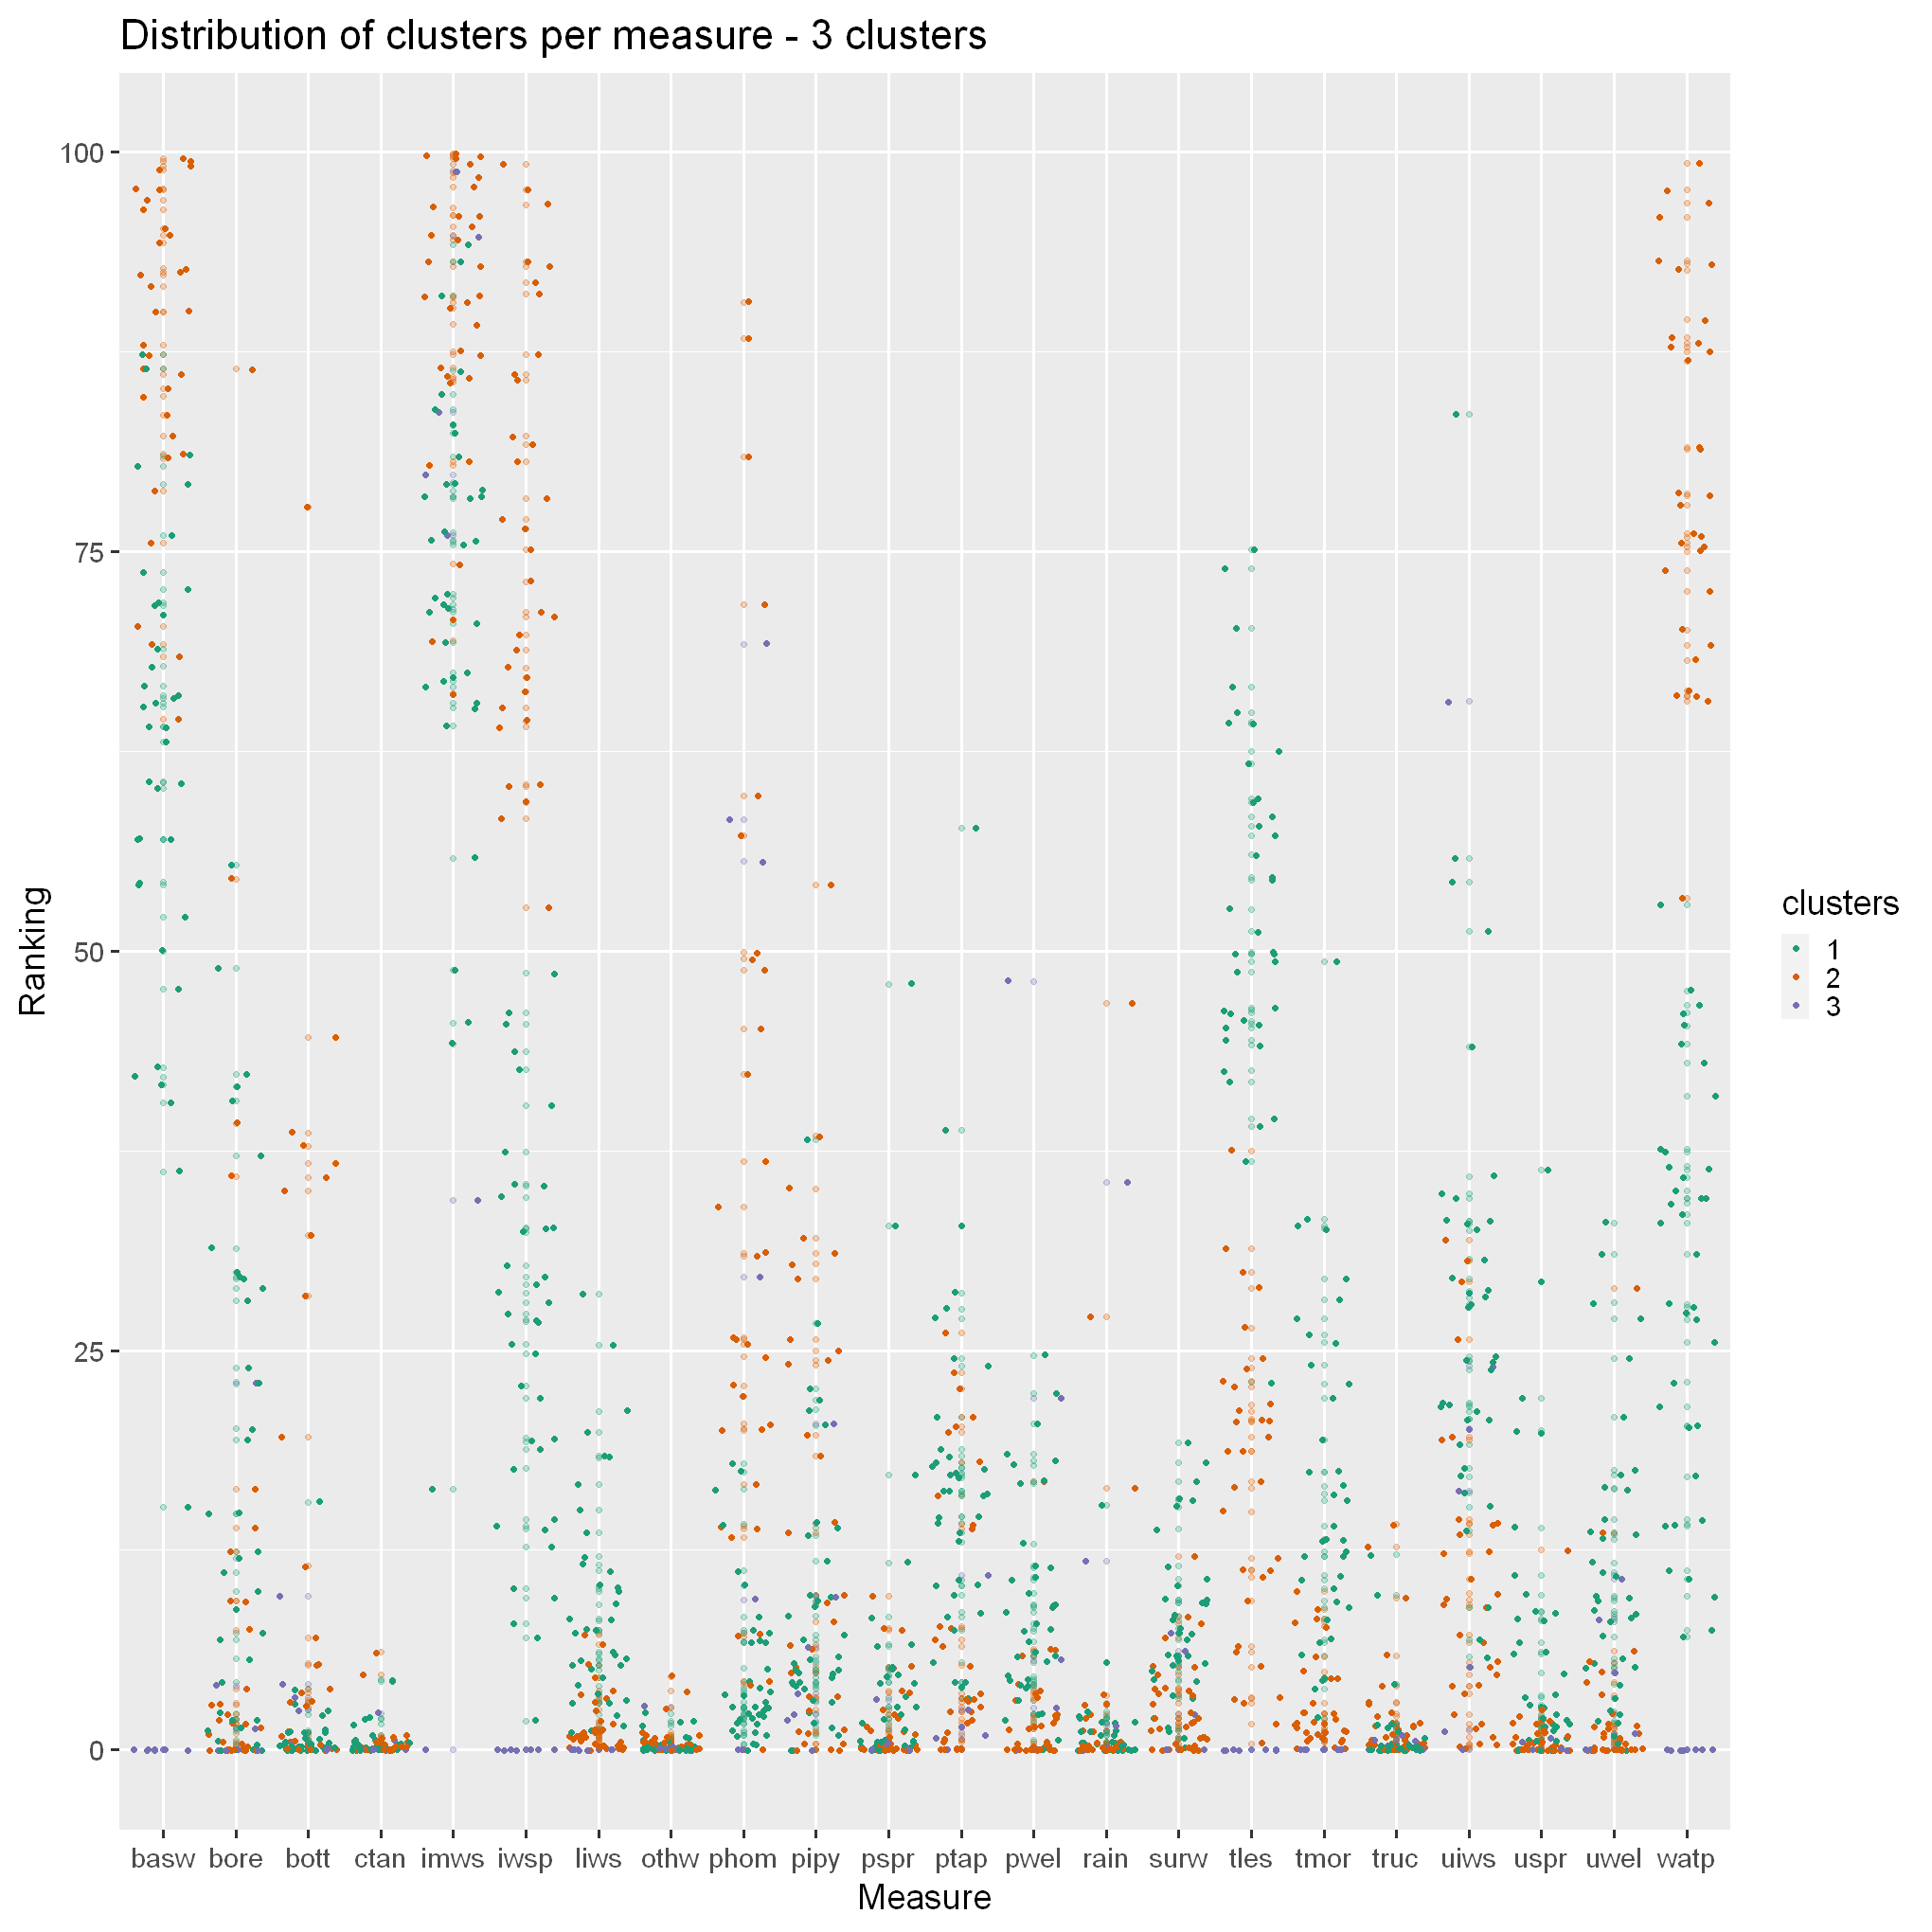

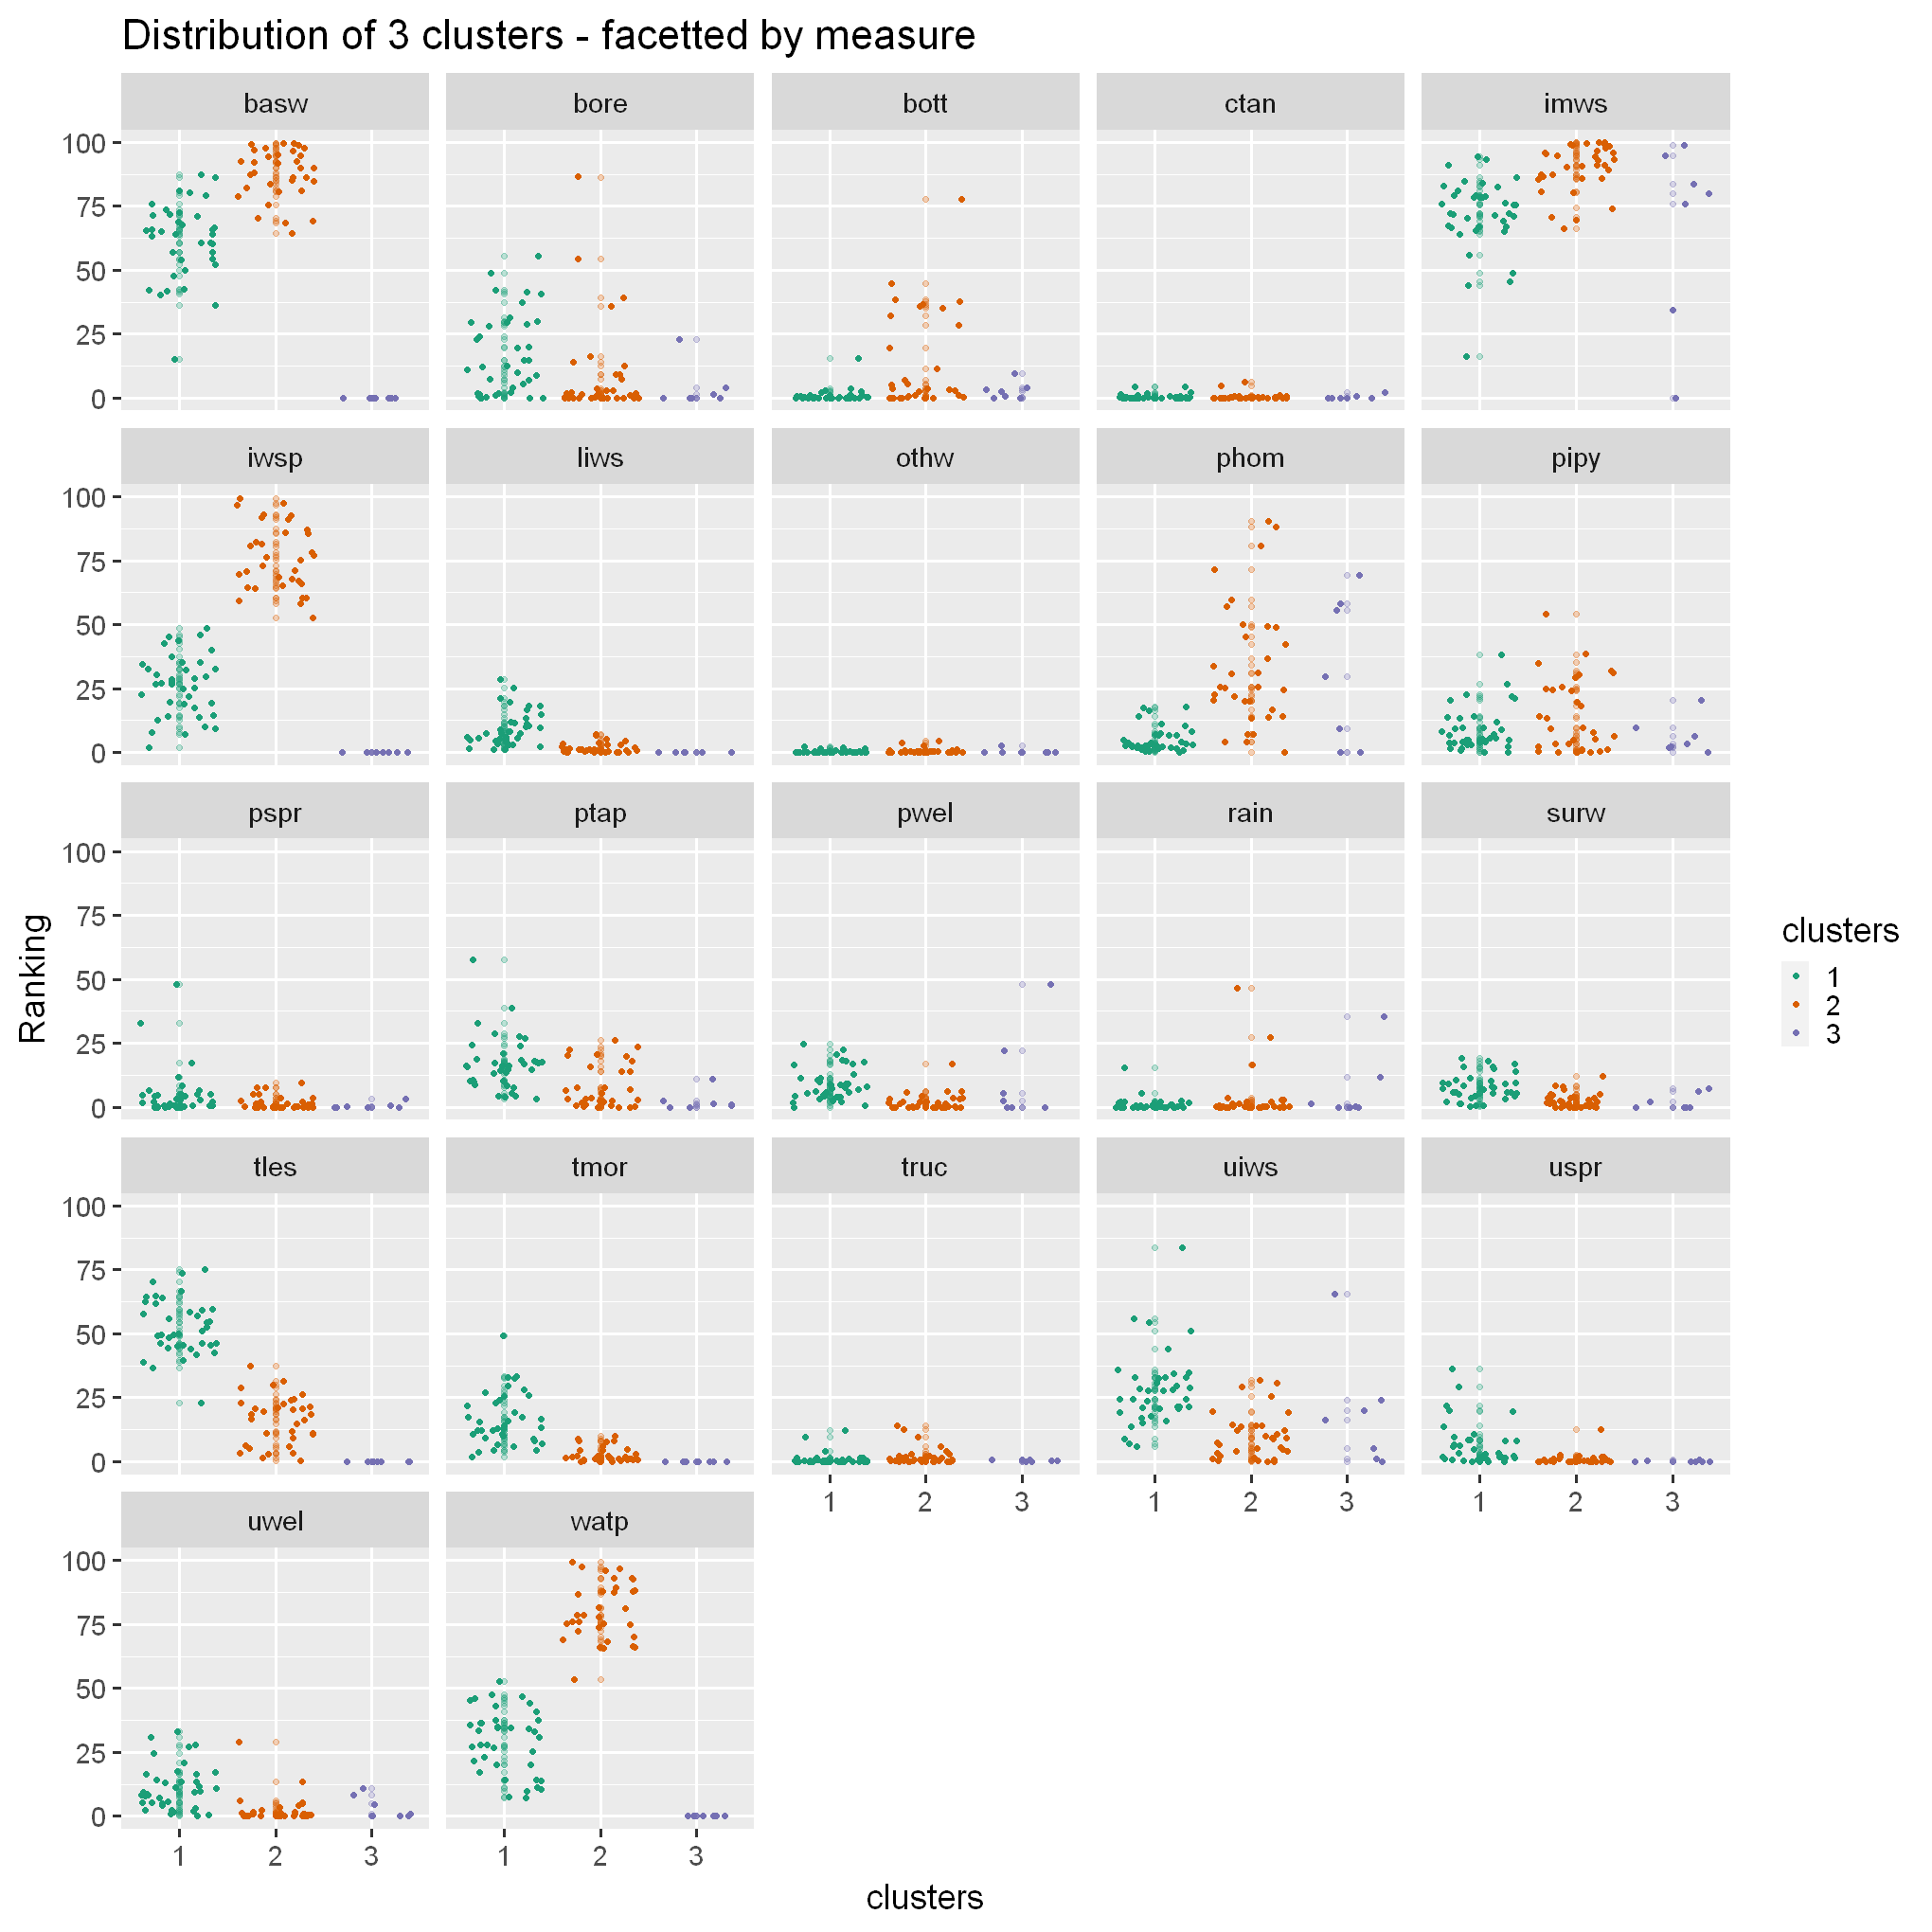

In [106]:
#data_wa$cluster <- cutree(hc.ward2,4) 
df.wa <- dfsimple[,c('ptap','bore','pspr', 'uspr', 'pwel', 'uwel','surw','tles','tmor','rain','phom','imws','pipy','truc', 'ctan', 'bott', 'uiws','othw','iwsp','basw','liws','watp' )]
hc.ward2=hclust(dist(df.wa), method ="ward.D2")
df.wa$clusters <- cutree(hc.ward2,3)
df.wa$clusters <- as.factor(df.wa$clusters)

p <- ggplot(df.wa, aes(clusters, ptap, color = clusters, fill = clusters)) +
  geom_point(alpha = 0.6) +
  geom_jitter() +
  geom_point() +
  ggtitle("Distribution of clusters by NARS Lab") +
  scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3")) 
p <- p + theme_grey(base_size = 22) 
p 

table(df.wa$clusters)

#Group by the cluster assignment and calculate averages
df3_clus_avg <- df.wa %>%
  group_by(clusters) %>%
  summarize_if(is.numeric, mean, na.rm=TRUE)


df3_clus_avg <- df4_clus_avg[ , 1:22]
df3_clus_avg
sapply(df4_clus_avg, class)
#Create a parallel coordinate plot of the values:
ggparcoord <- ggparcoord(df3_clus_avg, columns = c(2:22), 
           groupColumn = "clusters", scale = "globalminmax", order = "skewness") +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + geom_point(color = "#00AFBB") 
    
#make a dot plot
countries4_gathered <- df.wa %>% gather(Measure, Ranking, ptap:watp) 

g <- ggplot(countries4_gathered, aes(Measure, Ranking, color = clusters )) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of clusters per measure - 3 clusters") 
   
g <- g + theme_grey(base_size = 22) +  scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3")) 
g 
countries4_gathered %>% 

ggplot(aes(clusters, Ranking, col = clusters)) +
  geom_point(alpha = 0.3) +
  geom_jitter() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Distribution of 3 clusters - facetted by measure") +
  facet_wrap(~Measure) +
 theme_grey(base_size = 22) +  
scale_color_manual(values=c("#1b9e77","#d95f02","#7570b3"))
# set the set factor as for the clusters


# Rank Countries

In [111]:
df = read_excel( "C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/df-water-access.xlsx")

In [112]:
head(df) # clean df at next save (2 cluster columns - only 1 needed; etc) #df also needs to be only water accessibility variables

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,pipy,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,4.8,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,5.2,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,9.7,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,8.0,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,19.7,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,3.3,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5


In [113]:
df["norm"] <- apply(df[3:13], 1, function(x) sqrt(sum(x^2)) ) #assuming columns 5:10 are the water accessibility variables
# Ideally, df should just be the countries and the water access. variables ONLY. This, way, the code should then be:
# df["norm"] <- apply(df, 1, function(x) sqrt(sum(x^2)) )

In [114]:
df["distToCentroid"] = 0 # initialize

In [131]:
df.wa$clusters <- as.numeric(df.wa$clusters)
head(df.wa)
#Turn into numeric to find centroids

ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,...,truc,ctan,bott,uiws,othw,iwsp,basw,liws,watp,clusters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,...,1.5,4.4,0.2,28.7,1.7,35.4,65.3,5.0,45.3,1
2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,...,14.1,0.2,19.6,1.6,0.1,77.0,97.0,0.9,77.9,2
10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,...,9.7,4.3,1.2,33.1,1.8,32.6,57.0,7.5,34.5,1
0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,...,1.5,0.0,0.0,0.1,0.0,97.6,99.1,0.1,97.6,2
3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,...,9.5,0.7,0.1,9.4,1.1,71.2,86.4,3.4,75.9,2
2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,...,0.0,0.1,0.3,2.2,0.1,75.1,96.4,1.3,75.5,2


In [138]:
# assuming centroiddf.wa is your vector of cluster centroids

# copied this from your earlier notebook
df.wa.aggregate <- aggregate(df.wa, list(clusters=dfsimple$clusters), mean)
df.wa.aggregate <- df.wa.aggregate[,1:24]
centroiddf.wa <- apply(df.wa.aggregate, 1, function(x) sqrt(sum(x^2)) ) #How close is each country to the cen-troid of the cluster

head(centroiddf.wa)       
                       
                       
df$clusters <- dfsimple$clusters                      
head(df)

[1] 124.19578 173.28822  78.10943

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,bott,uiws,othw,iwsp,basw,liws,watp,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,0.2,28.7,1.7,35.4,65.3,5.0,45.3,90.57582,0,1
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,19.6,1.6,0.1,77.0,97.0,0.9,77.9,111.87435,0,2
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,1.2,33.1,1.8,32.6,57.0,7.5,34.5,85.89994,0,1
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,0.0,0.1,0.0,97.6,99.1,0.1,97.6,133.34377,0,2
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,0.1,9.4,1.1,71.2,86.4,3.4,75.9,99.82405,0,2
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,0.3,2.2,0.1,75.1,96.4,1.3,75.5,132.54520,0,2


In [154]:
# Then here, you compute the distance to centroid cluster by cluster
df[df$clusters == 1, "distToCentroid"] = abs(df[df$clusters == 1, "norm"] - centroiddf.wa[1])
df[df$clusters == 2, "distToCentroid"] = abs(df[df$clusters == 2, "norm"] - centroiddf.wa[2])
df[df$clusters == 3, "distToCentroid"] = abs(df[df$clusters == 3, "norm"] - centroiddf.wa[3])
#df[df$clusters == 4, "distToCentroid"] = abs(df[df$clusters == 4, "norm"] - centroiddf.wa[4])
                       

head(df)
write_xlsx(df , 'C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfcluster-rank.xlsx')

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,bott,uiws,othw,iwsp,basw,liws,watp,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,0.2,28.7,1.7,35.4,65.3,5.0,45.3,90.57582,33.61995,1
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,19.6,1.6,0.1,77.0,97.0,0.9,77.9,111.87435,61.41387,2
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,1.2,33.1,1.8,32.6,57.0,7.5,34.5,85.89994,38.29584,1
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,0.0,0.1,0.0,97.6,99.1,0.1,97.6,133.34377,39.94446,2
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,0.1,9.4,1.1,71.2,86.4,3.4,75.9,99.82405,73.46418,2
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,0.3,2.2,0.1,75.1,96.4,1.3,75.5,132.54520,40.74302,2


In [144]:
# You can then sort each subset by the size of "distToCentroid"
df %>% 
  arrange_at("Country", desc) %>%
  arrange_at("distToCentroid") %>%
  select(1, 25, 26)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Liberia,0.6185957,1
Malawi,1.2332457,1
Burundi,5.1408328,1
Sao Tome and Principe,12.5938068,1
Burkina Faso,14.2305563,1
Rwanda,15.9162786,1
Cambodia,16.8174931,3
Ghana,17.9834436,1
Uganda,18.4909059,1


In [145]:
#Cluster 1
df %>%
  filter(clusters == 1) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Afghanistan
Angola
Benin
Burkina Faso
Burundi
Cameroon
Central African Republic


In [146]:
#Cluster 2
df %>%
  filter(clusters == 2) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Albania
Armenia
Azerbaijan
Bangladesh
Bolivia
Colombia
Comoros


In [147]:
#Cluster 3
df %>%
  filter(clusters == 3) %>%
  select(Country) %>%
  head(7)

Country
<chr>
Brazil
Cambodia
Moldova
Morocco
Paraguay
Ukraine
Vietnam


#Cluster 4
df %>%
  filter(clusters == 4) %>%
  select(Country) %>%
  head(7)

In [148]:
# You can then sort each subset by the size of "distToCentroid"
df1 = df %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1, 25, 26)



In [150]:
head(df1)
cluster.one <- subset(df1, clusters == 1 )
cluster.two <- subset(df1, clusters == 2 )
cluster.three <- subset(df1, clusters == 3 )
#cluster.four <- subset(df1, clusters == 4 )
head(cluster.one)
summary(cluster.one)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Liberia,0.6185957,1
Malawi,1.2332457,1
Burundi,5.1408328,1
Sao Tome and Principe,12.5938068,1
Burkina Faso,14.2305563,1
Rwanda,15.9162786,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Liberia,0.6185957,1
Malawi,1.2332457,1
Burundi,5.1408328,1
Sao Tome and Principe,12.5938068,1
Burkina Faso,14.2305563,1
Rwanda,15.9162786,1


   Country          distToCentroid       clusters
 Length:38          Min.   : 0.6186   Min.   :1  
 Class :character   1st Qu.:19.4180   1st Qu.:1  
 Mode  :character   Median :23.8881   Median :1  
                    Mean   :25.6168   Mean   :1  
                    3rd Qu.:33.3597   3rd Qu.:1  
                    Max.   :45.1369   Max.   :1  

In [152]:
cluster.one %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.two %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
cluster.three %>% 
  arrange_at("Country", desc) %>%
   arrange_at("distToCentroid") %>%
    arrange_at("clusters") %>%
  select(1:3)
# cluster.four %>% 
#  arrange_at("Country", desc) %>%
#   arrange_at("distToCentroid") %>%
#    arrange_at("clusters") %>%
#  select(1:3)

Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Liberia,0.6185957,1
Malawi,1.2332457,1
Burundi,5.1408328,1
Sao Tome and Principe,12.5938068,1
Burkina Faso,14.2305563,1
Rwanda,15.9162786,1
Ghana,17.9834436,1
Uganda,18.4909059,1
Nigeria,18.9953503,1


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Egypt,38.50469,2
Armenia,39.94446,2
Bangladesh,40.74302,2
Colombia,49.98591,2
Jordan,58.22333,2
Pakistan,59.01902,2
Peru,59.64329,2
Albania,61.41387,2
Turkey,61.82469,2


Country,distToCentroid,clusters
<chr>,<dbl>,<dbl>
Cambodia,16.81749,3
Morocco,21.43062,3
Brazil,24.67501,3
Moldova,32.31005,3
Ukraine,37.44995,3
Vietnam,41.21715,3
Paraguay,78.10943,3


# World Map

In [173]:
df = read_excel('C:/Users/hichul/Desktop/2020-2021/Fall of 2020/Independent Study/water-accessibility/results/dfcluster-rank.xlsx') #change name of file to sth descriptive (e.g. country-clusters)
head(df)

Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,...,bott,uiws,othw,iwsp,basw,liws,watp,norm,distToCentroid,clusters
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,...,0.2,28.7,1.7,35.4,65.3,5.0,45.3,90.57582,33.61995,1
Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,...,19.6,1.6,0.1,77.0,97.0,0.9,77.9,111.87435,61.41387,2
Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,...,1.2,33.1,1.8,32.6,57.0,7.5,34.5,85.89994,38.29584,1
Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,...,0.0,0.1,0.0,97.6,99.1,0.1,97.6,133.34377,39.94446,2
Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,...,0.1,9.4,1.1,71.2,86.4,3.4,75.9,99.82405,73.46418,2
Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,...,0.3,2.2,0.1,75.1,96.4,1.3,75.5,132.54520,40.74302,2


In [174]:
df = df[, c(1,26)] # select only country name and cluster number
head(df)

Country,clusters
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,2
Bangladesh,2


In [175]:
colnames(df) = c('region', 'value') # change column names for ggplot
dim(df)
head(df)

[1] 78  2

region,value
<chr>,<dbl>
Afghanistan,1
Albania,2
Angola,1
Armenia,2
Azerbaijan,2
Bangladesh,2


In [176]:
# This is to convert country names in df to match those in the worldMap dataframe
coords <- joinCountryData2Map(df, joinCode = "NAME", nameJoinColumn = "region")
coords = data.frame(coords)
colnames(coords) = tolower(colnames(coords))
colnames(coords)
coords = drop_na(coords, value)
coords$name

76 codes from your data successfully matched countries in the map
2 codes from your data failed to match with a country code in the map
167 codes from the map weren't represented in your data


[1] "scalerank"    "labelrank"    "featurecla"   "sovereignt"   "sov_a3"      
 [6] "adm0_dif"     "level"        "type"         "admin"        "adm0_a3"     
[11] "geou_dif"     "geounit"      "gu_a3"        "su_dif"       "subunit"     
[16] "su_a3"        "name"         "abbrev"       "postal"       "name_forma"  
[21] "terr_"        "name_sort"    "map_color"    "pop_est"      "gdp_md_est"  
[26] "fips_10_"     "iso_a2"       "iso_a3"       "iso_n3"       "iso3"        
[31] "lon"          "lat"          "iso3.1"       "admin.1"      "region"      
[36] "continent"    "geo3major"    "geo3"         "image24"      "glocaf"      
[41] "stern"        "sresmajor"    "sres"         "gbd"          "avoidnumeric"
[46] "avoidname"    "ldc"          "sid"          "lldc"         "region"      
[51] "value"        "admin.2"      "iso3.2"

[1] Afghanistan           Angola                Albania              
 [4] Armenia               Azerbaijan            Burundi              
 [7] Benin                 Burkina Faso          Bangladesh           
[10] Bolivia               Brazil                Central African Rep. 
[13] Ivory Coast           Cameroon              Congo (Brazzaville)  
[16] Colombia              Dominican Rep.        Egypt                
[19] Eritrea               Ethiopia              Gabon                
[22] Ghana                 Guinea                Gambia               
[25] Guatemala             Guyana                Honduras             
[28] Haiti                 Indonesia             India                
[31] Jordan                Kazakhstan            Kenya                
[34] Kyrgyzstan            Cambodia              Liberia              
[37] Lesotho               Morocco               Moldova              
[40] Madagascar            Mali                  Myanmar              
[43] Mozambique            Mauritania            Malawi               
[46] Namibia               Niger                 Nigeria              
[49] Nicaragua             Nepal                 Pakistan             
[52] Peru                  Philippines           Papua New Guinea     
[55] Paraguay              Rwanda                Senegal              
[58] Sierra Leone          Chad                  Togo                 
[61] Tajikistan            Turkmenistan          East Timor           
[64] Turkey                Tanzania              Uganda               
[67] Ukraine               Uzbekistan            Vietnam              
[70] Yemen                 South Africa          Zambia               
[73] Zimbabwe              Comoros               Maldives             
[76] Sao Tome and Principe
243 Levels: Afghanistan Aland Albania Algeria American Samoa Andorra ... Zimbabwe

In [177]:
setdiff(df$region,coords$name)

[1] "Central African Republic"  "Congo"                    
[3] "Congo Democratic Republic" "Cote d'Ivoire"            
[5] "Dominican Republic"        "Eswatini"                 
[7] "Kyrgyz Republic"           "Timor-Leste"

In [178]:
# Correct the country names in DF
df[df=='Timor-Leste'] = "East Timor"
df[df=='Central African Republic'] = "Central African Rep."
df[df=='Cote d\'Ivoire'] = "Ivory Coast"
df[df=='Dominican Republic'] = "Dominican Rep."
df[df=='Kyrgyz Republic'] = "Kyrgyzstan"
df[df=='Eswatini'] = "Swaziland"
df[df=='Congo'] = "Congo (Brazzaville)"
df[df=='Congo Democratic Republic'] = "Congo (Kinshasa)"

In [179]:
# Get world map data (lat/long)
countrynames = df$region
worldMap <- getMap()
country_indices <- which(worldMap$NAME%in%countrynames)

In [180]:
# Get coordinates for all countries to plot base map
allCoords <- lapply(seq(1,243), function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})
allCoords <- do.call("rbind", allCoords)


In [181]:
# Get coordinates strictly for those in water accessibility dataset
waterCoords <- lapply(country_indices, function(i){
  dfn <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  dfn$region =as.character(worldMap$NAME[i])
  colnames(dfn) <- list("long", "lat", "region")
  return(dfn)
})

waterCoords <- do.call("rbind", waterCoords)
waterCoords$value <- df$value[match(waterCoords$region,df$region)]
waterCoords$value <- factor(waterCoords$value)

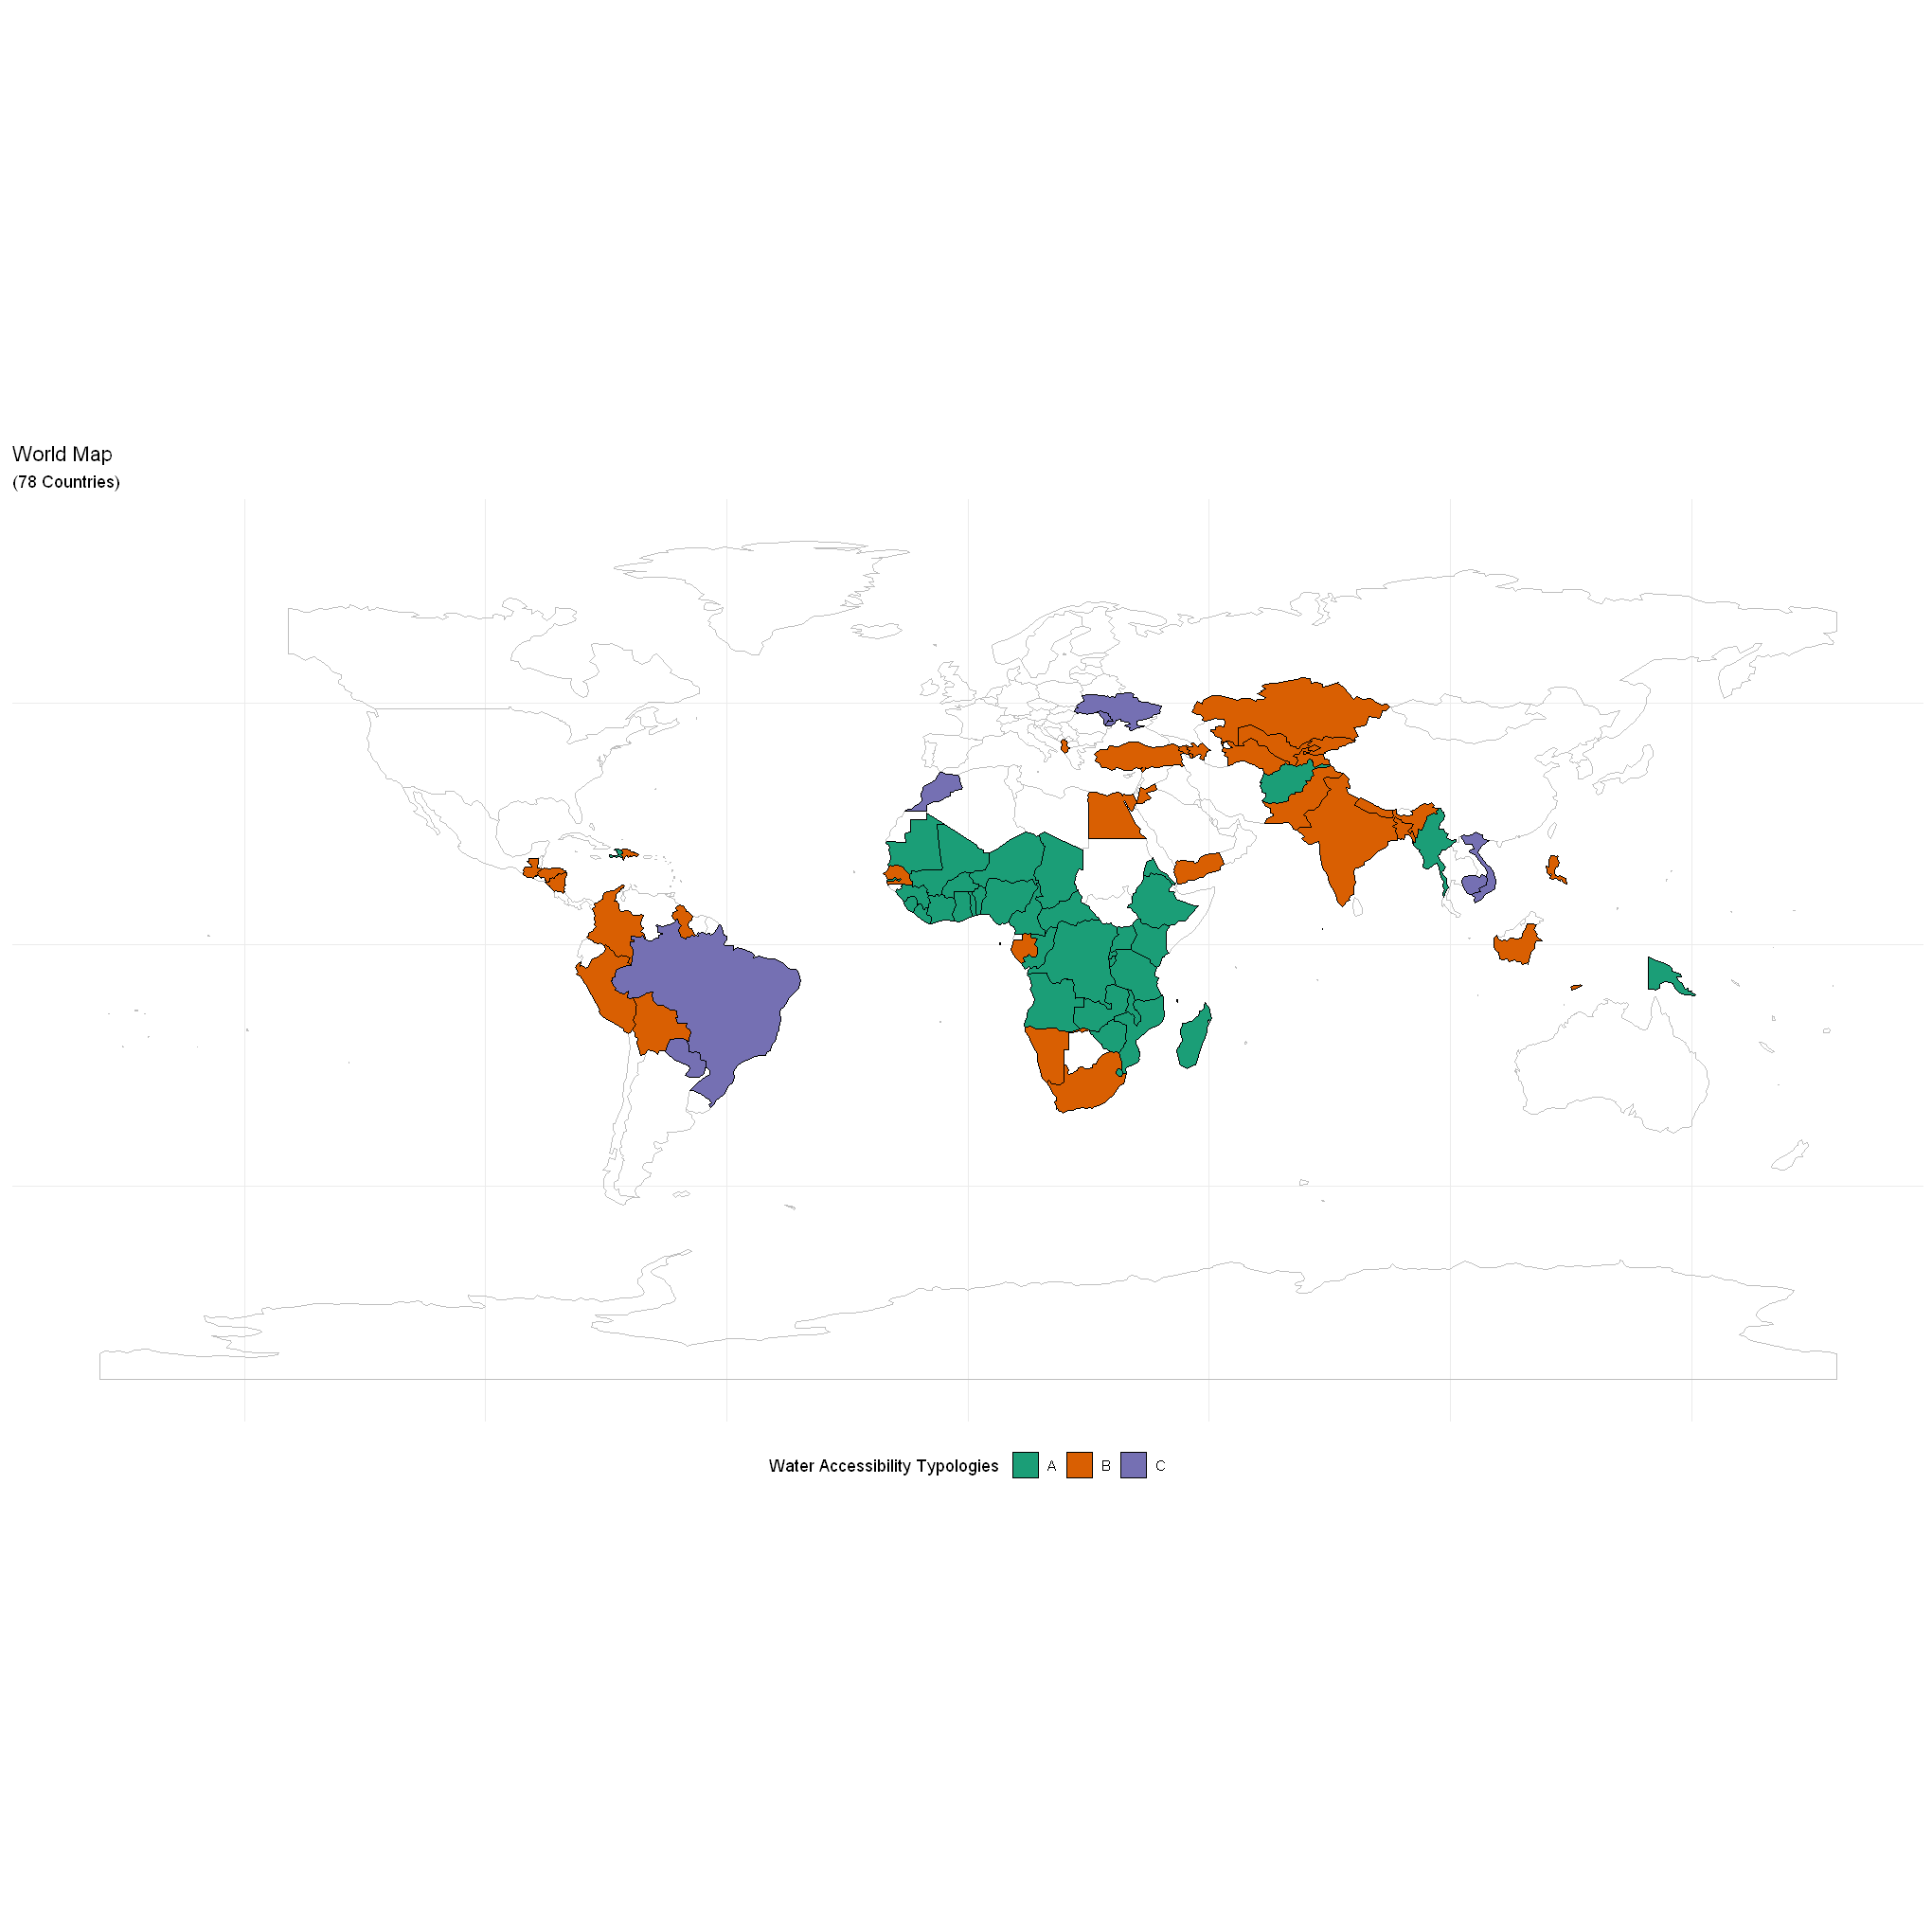

In [183]:
# Plot
options(repr.plot.width=17, repr.plot.height=17)
par(mar = c(1,1,1,1))
par(cex=1)
ggplot() +
    geom_sf(color = "black", fill= 'antiquewhite') +
    xlab("Longitude") + ylab("Latitude") +
    geom_polygon(data= allCoords, mapping = aes(x =long, y=lat,group = region),color="grey",fill=NA) + 
    geom_polygon( data = waterCoords, mapping = aes(x =long, y=lat,group = region, fill=value), size=.3,color="black") +
    expand_limits(x = waterCoords$long, y = waterCoords$lat)  + 
    scale_fill_brewer(palette='Dark2', name="Water Accessibility Typologies", na.value="grey", labels = c("A", "B", "C")) +  #labels = c())+
    ggtitle("World Map", subtitle = paste0("(", length(unique(df$region)), " Countries)")) +
    theme_minimal() +
    theme(legend.position = "bottom",
        axis.ticks = element_blank(), 
        axis.title = element_blank(), 
        axis.text =  element_blank()) 
#     #guides(fill = guide_colorbar(barwidth = 10, barheight = .5))


#Ref: https://egallic.fr/en/european-map-using-r/